<a href="https://colab.research.google.com/github/Cybermorri/Portfolio/blob/main/AI4Bitcoins(copy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Techniques for Bitcoin Blockchain Transactions Classification

#Table of Main Contents

- [1. Introduction](#Introduction)
- [2. Imports](#Imports)
- [3. Preliminary Analyses](#Preliminary-Analyses)
  - [3.1 Summary Statistics](#Summary-Statistics)
  - [3.2 Data Visualization](#Data-Visualization)
  - [3.3 Analyses Recap](#Analyses-Recap)
- [4. Supervised Learning](#Supervised-Learning)
  - [4.1 Linear Models](#Linear-Models)
  - [4.2 Non-Linear Models](#Non-Linear-Models)
  - [4.3 Ensembles](#Ensembles)
  - [4.4 Neural Networks](#Neural-Networks)
  - [4.5 Supervised Learning Recap](#Supervised-Learning-Recap)
- [5. Unsupervised Learning](#Unsupervised-Learning)
  - [5.1 PCA for Dimensionality Reduction](#PCA-for-Dimensionality-Reduction)
  - [5.2 UMAP for Dimensionality Reduction](#UMAP-for-Dimensionality-Reduction)
  - [5.3 UL for Feature Engineering](#UL-for-Feature-Engineering)
  - [5.4 Unsupervised Learning Recap](#Unsupervised-Learning-Recap)
- [6. Anomaly Detection](#Anomaly-Detection)
  - [6.1 Univariate AD](#section61)
  - [6.2 Multivariate AD](#Multivariate-AD)
  - [6.3 AD Recap](#AD-Recap)
- [7. Graph-Based Learning (DEMO)](#Graph-Based-Learning-(DEMO))
  - [7.1 Network Graph Representations](#Network-Graph-Representations)
  - [7.2 Graph Neural Networks](#Graph-Neural-Networks)
- [8. Key Takeaways](#Key-Takeaways)


## Introduction
First of all, we think that a brief introduction on the cryptocurrency world and the nature of the cyberthreats that inhabitate it is useful to understand the content and scope of our work.

Cryptocurrencies are digital assets that rely on cryptographic techniques and decentralized networks to enable secure, peer-to-peer transactions.  
No central authorities, like central banks, are present: blockchain technology grants transparent and immutable record of exchanges.  
This digital and dynamic nature gives cryptocurrencies a distinct cyber dimension: they exist entirely in cyberspace and are therefore exposed to cyberattacks, fraud, and misuse.  
Bitcoin, the first crypto ever created, is also the most used one thanks to its two main characteristics: transparency and anonymity.   
When a Bitcoin transaction occurs, it is permanently stored on the blockchain, making it publicly accessible by anyone at all times, while the identities of the users remain hidden behind cryptographic addressess.  
So Bitcoin is universal, completely digital, immune to authorities like banks or governments, and grants cryptographic anonimity to its users?  
Sounds like the perfect currency to use for illegal stuff!

Malicious actors thrive in the crypto world: Bitcoin wallets have become subjects and objects of illicit activities.  
Since manual analyses of transactions are impossible, Machine Learing has become a crucial tool to address these threats.  
These large volume of data can be used to train ML models to help us detect cybercriminals: automated detection of suspicious transactions, identification of fraudulent wallets, and prediction of emerging cyber threats are possible thanks to our old ally Machine Learning.

In this project we use public real-world data to train different ML models.  While some applications are very basic, all outcomes are nevertheless very useful for gaining a insight about ML applications in modern cybersecurity environments.
  
---  

P.S.: Here are some very interesting sources to have a broader view on ML for Bitcoin transactions:  

* [Blockcain basics](https://www.geeksforgeeks.org/software-engineering/blockchain/).
*   [Analysis Techniques for Illicit Bitcoin Transactions (Turner et al., 2020)](https://www.frontiersin.org/journals/computer-science/articles/10.3389/fcomp.2020.600596/) -> nice general overview.
*   [Toward Detecting Illegal Transactions on Bitcoin Using Machine‑Learning Methods (Lee et al., 2019)](https://link.springer.com/chapter/10.1007/978-981-15-2777-7_42?) -> lot of info about ML for transactions classification.
* [A Machine Learning and Blockchain Based Efficient Fraud Detection Mechanism (Ashfaq et al., 2022)](https://www.mdpi.com/1424-8220/22/19/7162?type=check_update&version=3) -> interesting hybrid mechanism and nice simple insightful for choice of classification algorithms.
* [Illegal Activity Detection on Bitcoin Transaction using Deep Learning (Nerurkar et al., 2023)](https://link.springer.com/article/10.1007/s00500-022-07779-1?)
* [Graph convolution network for fraud detection in bitcoin transactions (2025)](https://www.nature.com/articles/s41598-025-95672-w.pdf) -> these two are recent and work on interesting modern deep learning applications (Graph Convolution Networks).
* [Demystifying Fraudulent Transactions and Illicit Nodes in the Bitcoin Network for Financial Forensics (Elmougy & Liu, 2023)](https://arxiv.org/pdf/2306.06108) -> done by the authors of our dataset, so this will be fundamental for our research.

##Dataset characteristics
We are going to work with the [EllipticPlusPlus dataset](https://github.com/git-disl/EllipticPlusPlus) consisting of 203k Bitcoin transactions and 822k wallet addresses.  
We may try to use this data to train different types of models to detect fraudolent transactions and detect illicit actors (wallets).  
After having downloaded the folder, we can see that the available data is organized in 9 different files:

1. txs_features.csv                                    # Feature data for all
transactions
2. txs_classes.csv                                     # Class data for all transactions
3. txs_edgelist.csv                                    # Transaction-Transaction graph edgelist
4. wallets_features.csv                                # Feature data for all actors
5. wallets_classes.csv                                 # Class data for all actors
6. wallets_features_classes_combined
7. TxAddr_edgelist.csv # Transaction-Address graph edgelist
8. AddrTx_edgelist.csv                                 # Address-Transaction graph edgelist
9. TxAddr_edgelist.csv                                 # Transaction-Address graph edgelist

All # descriptions are reported directly from the [github page](https://github.com/git-disl/EllipticPlusPlus).  
The file wallets_features_classes_combined is the only one which is not described in the repository but, intuitively, it may be exactly what it seems: a combination of the wallets features and classes!  
Of course during our research we are going to cite the info and instructions reported on github and on [this paper](https://arxiv.org/pdf/2306.06108) published by the dataset authors themselves (we don't like to throw away free good advice).  
Nevertheless, we'll check all data before computing ML algorithms (you never know...).




## Imports

In [ ]:
#core Python and numerical libraries
import random
import os
import glob
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Jupyter/Colab utilities
from IPython.display import display

#scaling
from sklearn.preprocessing import MinMaxScaler

#evaluation f
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
import time

#supervised
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

#supervised-XGBoost
!pip install xgboost -q

from xgboost import XGBClassifier

#supervised-LightGBM
!pip install lightgbm -q

from lightgbm import LGBMClassifier

#unsupervised
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

#unsupervised-UMAP
!pip install umap-learn -q

import umap

#anomaly detection
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import median_abs_deviation

#GBL
import networkx as nx
import plotly.graph_objs as go


##Preliminary Analyses

### Summary Statistics
We have seen that we are able to work with a lot of data about both Bitcoin transactions and wallets.  
However, after having taken a glance at the github page and the paper, we have some doubts about using ALL the data.  
We are confident about working with transactions (many features, labeled, easy to interpretate) but not fully sure about wallets.
Therefore, let's first take a look at the wallets dataset (after mounting all data of course):

In [ ]:
#mount
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#exact path
%cd "/content/drive/.shortcut-targets-by-id/1MRPXz79Lu_JGLlJ21MDfML44dKN9R08l/Elliptic++ Dataset"
DATA_DIR = "/content/drive/.shortcut-targets-by-id/1MRPXz79Lu_JGLlJ21MDfML44dKN9R08l/Elliptic++ Dataset"

/content/drive/.shortcut-targets-by-id/1MRPXz79Lu_JGLlJ21MDfML44dKN9R08l/Elliptic++ Dataset


In [ ]:
#check our data folder (lot of stuff)
!ls -lh

total 2.1G
-r-------- 1 root root 192M Feb  2  2023 AddrAddr_edgelist.csv
-r-------- 1 root root  21M Feb  2  2023 AddrTx_edgelist.csv
-r-------- 1 root root  36M Feb  2  2023 TxAddr_edgelist.csv
-r-------- 1 root root 2.3M Feb  2  2023 txs_classes.csv
-r-------- 1 root root 4.3M Feb  2  2023 txs_edgelist.csv
-r-------- 1 root root 663M Feb  2  2023 txs_features.csv
-r-------- 1 root root  30M Feb  2  2023 wallets_classes.csv
-r-------- 1 root root 581M Feb  2  2023 wallets_features_classes_combined.csv
-r-------- 1 root root 579M Feb  2  2023 wallets_features.csv


Ok, we have access to all the data. Let's first take a look at the description of the wallets dataset given by the authors:  
*"The actors (wallet addresses) dataset is a graph network of 822,942
wallet addresses, each with 56 features... Five
csv files are used... Each address has an entry in wallets_features.csv, with numerical data for the time step and 56 address features ... for each transaction it was involved in, and an entry in wallets_classes.csv, representing its class label (1: illicit, 2: licit, 3: unknown).*  
*...  
We also create AddrAddr_edgelist.csv to record
the pairwise interactions of input and output addresses through
Bitcoin transactions. Each entry represents the input address and
output address relationship of one transaction. If there are multiple
transactions between a pair of addresses, then there are multiple en-
tries in this table. Additionally, we create AddrTx_edgelist.csv,
where each entry represents the relationship between an input
address and a transaction, and TxAddr_edgelist.csv, with each
entry representing a directed connection between a transaction and
an output address"*

Large and complicated data!  
For now, We can discard the edgelists, since they are used for building graphs (we don't think we can use them for our simple ML purpouses...).   
But let's check some rows, the data and dataypes to understand the dataset structure:

In [ ]:
LIMIT = 5000
FILENAMES = [
    "wallets_classes.csv",
    "wallets_features.csv",
    "wallets_features_classes_combined.csv",
]
df_classes   = pd.read_csv("wallets_classes.csv", nrows=LIMIT, low_memory=False)
df_features  = pd.read_csv("wallets_features.csv", nrows=LIMIT, low_memory=False)
df_combined  = pd.read_csv("wallets_features_classes_combined.csv", nrows=LIMIT, low_memory=False)

#show shapes and a quick look
print("\n[SHAPES]")
print("classes  :", df_classes.shape)
print("features :", df_features.shape)
print("combined :", df_combined.shape)

print("\n[HEADS]")
display(df_classes.head(3))
display(df_features.head(3))
display(df_combined.head(3))

print("\n[DTYPES]")
print("classes  dtypes:")
display(df_classes.dtypes.to_frame("dtype").T)
print("features dtypes:")
display(df_features.dtypes.to_frame("dtype").T)
print("combined dtypes:")
display(df_combined.dtypes.to_frame("dtype").T)



[SHAPES]
classes  : (5000, 2)
features : (5000, 57)
combined : (5000, 58)

[HEADS]


address  class
0  111112TykSw72ztDN2WJger4cynzWYC5w      2
1  1111DAYXhoxZx2tsRnzimfozo783x1yC2      3
2   1111VHuXEzHaRCgXbVwojtaP7Co3QABb      2

address  Time step  num_txs_as_sender  \
0  111112TykSw72ztDN2WJger4cynzWYC5w         25                0.0   
1  1111DAYXhoxZx2tsRnzimfozo783x1yC2         25                0.0   
2  1111DAYXhoxZx2tsRnzimfozo783x1yC2         29                0.0   

   num_txs_as receiver  first_block_appeared_in  last_block_appeared_in  \
0                  1.0                 439586.0                439586.0   
1                  8.0                 439589.0                485959.0   
2                  8.0                 439589.0                485959.0   

   lifetime_in_blocks  total_txs  first_sent_block  first_received_block  ...  \
0                 0.0        1.0               0.0              439586.0  ...   
1             46370.0        8.0               0.0              439589.0  ...   
2             46370.0        8.0               0.0              439589.0  ...   

   blocks_btwn_output_txs_min  blocks_btwn_output_txs_max  \
0                         0.0                         0.0   
1                         0.0                     20164.0   
2                         0.0                     20164.0   

   blocks_btwn_output_txs_mean  blocks_btwn_output_txs_median  \
0                     0.000000                            0.0   
1                  6624.285714                         8060.0   
2                  6624.285714                         8060.0   

   num_addr_transacted_multiple  transacted_w_address_total  \
0                           0.0                        24.0   
1                           0.0                         8.0   
2                           0.0                         8.0   

   transacted_w_address_min  transacted_w_address_max  \
0                       1.0                       1.0   
1                       1.0                       1.0   
2                       1.0                       1.0   

   transacted_w_address_mean  transacted_w_address_median  
0                        1.0                          1.0  
1                        1.0                          1.0  
2                        1.0                          1.0  

[3 rows x 57 columns]

address  Time step  class  num_txs_as_sender  \
0  111112TykSw72ztDN2WJger4cynzWYC5w         25      2                0.0   
1  1111DAYXhoxZx2tsRnzimfozo783x1yC2         25      3                0.0   
2  1111DAYXhoxZx2tsRnzimfozo783x1yC2         29      3                0.0   

   num_txs_as receiver  first_block_appeared_in  last_block_appeared_in  \
0                  1.0                 439586.0                439586.0   
1                  8.0                 439589.0                485959.0   
2                  8.0                 439589.0                485959.0   

   lifetime_in_blocks  total_txs  first_sent_block  ...  \
0                 0.0        1.0               0.0  ...   
1             46370.0        8.0               0.0  ...   
2             46370.0        8.0               0.0  ...   

   blocks_btwn_output_txs_min  blocks_btwn_output_txs_max  \
0                         0.0                         0.0   
1                         0.0                     20164.0   
2                         0.0                     20164.0   

   blocks_btwn_output_txs_mean  blocks_btwn_output_txs_median  \
0                     0.000000                            0.0   
1                  6624.285714                         8060.0   
2                  6624.285714                         8060.0   

   num_addr_transacted_multiple  transacted_w_address_total  \
0                           0.0                        24.0   
1                           0.0                         8.0   
2                           0.0                         8.0   

   transacted_w_address_min  transacted_w_address_max  \
0                       1.0                       1.0   
1                       1.0                       1.0   
2                       1.0                       1.0   

   transacted_w_address_mean  transacted_w_address_median  
0                        1.0                          1.0  
1                        1.0                          1.0  
2                        1.0                          1.0  

[3 rows x 58 columns]


[DTYPES]
classes  dtypes:


address  class
dtype  object  int64

features dtypes:


address Time step num_txs_as_sender num_txs_as receiver  \
dtype  object     int64           float64             float64   

      first_block_appeared_in last_block_appeared_in lifetime_in_blocks  \
dtype                 float64                float64            float64   

      total_txs first_sent_block first_received_block  ...  \
dtype   float64          float64              float64  ...   

      blocks_btwn_output_txs_min blocks_btwn_output_txs_max  \
dtype                    float64                    float64   

      blocks_btwn_output_txs_mean blocks_btwn_output_txs_median  \
dtype                     float64                       float64   

      num_addr_transacted_multiple transacted_w_address_total  \
dtype                      float64                    float64   

      transacted_w_address_min transacted_w_address_max  \
dtype                  float64                  float64   

      transacted_w_address_mean transacted_w_address_median  
dtype                   float64                     float64  

[1 rows x 57 columns]

combined dtypes:


address Time step  class num_txs_as_sender num_txs_as receiver  \
dtype  object     int64  int64           float64             float64   

      first_block_appeared_in last_block_appeared_in lifetime_in_blocks  \
dtype                 float64                float64            float64   

      total_txs first_sent_block  ... blocks_btwn_output_txs_min  \
dtype   float64          float64  ...                    float64   

      blocks_btwn_output_txs_max blocks_btwn_output_txs_mean  \
dtype                    float64                     float64   

      blocks_btwn_output_txs_median num_addr_transacted_multiple  \
dtype                       float64                      float64   

      transacted_w_address_total transacted_w_address_min  \
dtype                    float64                  float64   

      transacted_w_address_max transacted_w_address_mean  \
dtype                  float64                   float64   

      transacted_w_address_median  
dtype                     float64  

[1 rows x 58 columns]

Mmh ok, let's check all the column names:

In [ ]:
print("\n[INFO] wallets_classes.csv:")
df_classes.info()

print("\n[INFO] wallets_features.csv:")
df_features.info()



[INFO] wallets_classes.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  5000 non-null   object
 1   class    5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.3+ KB

[INFO] wallets_features.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   address                        5000 non-null   object 
 1   Time step                      5000 non-null   int64  
 2   num_txs_as_sender              5000 non-null   float64
 3   num_txs_as receiver            5000 non-null   float64
 4   first_block_appeared_in        5000 non-null   float64
 5   last_block_appeared_in         5000 non-null   float64
 6   lifetime_in_blocks             5000 non-null

We have the address (i.e. the wallet address, the main entity, the index column), a categorical feature called "Time_step" and 55 numerical features.

In the wallet dataset, each row represents a wallet (actor), not a single transaction.  
Using wallets dataset have some issues:  
* A wallet is made up of many transactions, so instead of “raw” features like transaction amount or input/output counts, we now mostly have aggregated statistics over potentially hundreds of transactions (e.g., transacted_with_address_mean).
* The labels (1 = illicit, 2 = licit, 3 = unknown) for wallets are not directly observed: they are propagated or inferred from the transaction graph (built from the _edgelist files).
If we look at the paper:  
*"A wallet address is labelled illicit if it has at least one edge with an illicit transaction, licit if the ratio of its total unknown-to-licit transactions is > 3.7, and unknown otherwise. The threshold (3.7) corresponds to the ratio of unknown-to-licit transactions in the transactions dataset".* So why not work directly only on transactions?
* While transactions may probably have unique Ids, the same address may appear in multiple Time steps, which increases redundancy and memory use (problem with duplicates).  
* Reading wallets may be heavy for a Macbook Air RAM :(

Let's move on to transactions and check the description given by the authors about the transactions dataset:      
*"The transactions dataset consists of a time-series graph with 49 distinct time steps, 203,769 transactions (nodes), and 234,355 directed
edges representing the payment flows. Each transaction node is la
belled as illicit, licit, or unknown; with 2% (4,545) labelled as class-1
(illicit), 21% (42,019) as class-2 (licit), and the remaining transactions
are unknown with regard to licit/illicit, hence labelled as class-3.  
Each transaction node has an entry in txs_features.csv, with numerical data for
183 transaction features, and an entry in txs_classes.csv, representing its class label (1: illicit, 2: licit, 3: unknown). Each edge has
an entry in txs_edgelist.csv (indexed by two transaction IDs),
representing money flow from one transaction to another. Among
the 183 node features, 166 features are inherited from the Elliptic
dataset, i.e., the time step, 93 local features, representing local information about the transaction, and 72 aggregate features, obtained by aggregating transaction information one-hop forward/backward.
The remaining 17 node features are gathered by our Elliptic++ data
collection pipeline (with the exception of the 0.5% of transactions
that were not deanonymized) as augmented features."*  
Let's check on this:

Preview like for wallets but this time let's check the edgelist too (maybe it's useful?):

In [ ]:
LIMIT = 5000
edge_preview = pd.read_csv("txs_edgelist.csv", nrows=LIMIT, low_memory=False)
print("edgelist preview:", edge_preview.shape)
display(edge_preview.head(3))

edgelist preview: (5000, 2)


txId1      txId2
0  230425980    5530458
1  232022460  232438397
2  230460314  230459870

Mmh ok the edgelist is address-address record table, we don't think that it is useful for us at the moment (but we will use it later ;) ).
Let's check the column names of the features and classes:

In [ ]:
TX_FEAT  = os.path.join(DATA_DIR, "txs_features.csv")
TX_CLASS = os.path.join(DATA_DIR, "txs_classes.csv")


In [ ]:
cols_features = pd.read_csv(TX_FEAT, nrows=0).columns.tolist()
print(f"Number of columns in txs_features: {len(cols_features)}\n")
print(cols_features)

Number of columns in txs_features: 184

['txId', 'Time step', 'Local_feature_1', 'Local_feature_2', 'Local_feature_3', 'Local_feature_4', 'Local_feature_5', 'Local_feature_6', 'Local_feature_7', 'Local_feature_8', 'Local_feature_9', 'Local_feature_10', 'Local_feature_11', 'Local_feature_12', 'Local_feature_13', 'Local_feature_14', 'Local_feature_15', 'Local_feature_16', 'Local_feature_17', 'Local_feature_18', 'Local_feature_19', 'Local_feature_20', 'Local_feature_21', 'Local_feature_22', 'Local_feature_23', 'Local_feature_24', 'Local_feature_25', 'Local_feature_26', 'Local_feature_27', 'Local_feature_28', 'Local_feature_29', 'Local_feature_30', 'Local_feature_31', 'Local_feature_32', 'Local_feature_33', 'Local_feature_34', 'Local_feature_35', 'Local_feature_36', 'Local_feature_37', 'Local_feature_38', 'Local_feature_39', 'Local_feature_40', 'Local_feature_41', 'Local_feature_42', 'Local_feature_43', 'Local_feature_44', 'Local_feature_45', 'Local_feature_46', 'Local_feature_47', 'Local_

In [ ]:
cols_classes = pd.read_csv(TX_CLASS, nrows=0).columns.tolist()
print(f"Number of columns in txs_classes: {len(cols_classes)}\n")
print(cols_classes)


Number of columns in txs_classes: 2

['txId', 'class']


Now a preview of some rows:

In [ ]:
PREVIEW_N = 5_000
feat_preview  = pd.read_csv(TX_FEAT,  nrows=PREVIEW_N, low_memory=False)
class_preview = pd.read_csv(TX_CLASS, nrows=PREVIEW_N, low_memory=False)

print("features preview:", feat_preview.shape, "classes preview:", class_preview.shape)
display(feat_preview.head(3))
display(class_preview.head(3))

features preview: (5000, 184) classes preview: (5000, 2)


txId  Time step  Local_feature_1  Local_feature_2  Local_feature_3  \
0   3321          1        -0.169615        -0.184668        -1.201369   
1  11108          1        -0.137586        -0.184668        -1.201369   
2  51816          1        -0.170103        -0.184668        -1.201369   

   Local_feature_4  Local_feature_5  Local_feature_6  Local_feature_7  \
0         -0.12197        -0.043875        -0.113002        -0.061584   
1         -0.12197        -0.043875        -0.113002        -0.061584   
2         -0.12197        -0.043875        -0.113002        -0.061584   

   Local_feature_8  ...  in_BTC_min  in_BTC_max  in_BTC_mean  in_BTC_median  \
0        -0.160199  ...    0.534072    0.534072     0.534072       0.534072   
1        -0.127429  ...    5.611878    5.611878     5.611878       5.611878   
2        -0.160699  ...    0.456608    0.456608     0.456608       0.456608   

   in_BTC_total  out_BTC_min  out_BTC_max  out_BTC_mean  out_BTC_median  \
0      0.534072     0.166899     0.367074      0.266986        0.266986   
1      5.611878     0.586194     5.025584      2.805889        2.805889   
2      0.456608     0.227990     0.228518      0.228254        0.228254   

   out_BTC_total  
0       0.533972  
1       5.611778  
2       0.456508  

[3 rows x 184 columns]

txId  class
0   3321      3
1  11108      3
2  51816      3

Let's drop the index column:

In [ ]:
feat_preview  = pd.read_csv(TX_FEAT,  nrows=5000, low_memory=False, index_col=0)
class_preview = pd.read_csv(TX_CLASS, nrows=5000, low_memory=False, index_col=0)

print("features preview:", feat_preview.shape, "classes preview:", class_preview.shape)
display(feat_preview.head(3))
display(class_preview.head(3))


features preview: (5000, 183) classes preview: (5000, 1)


Time step  Local_feature_1  Local_feature_2  Local_feature_3  \
txId                                                                  
3321           1        -0.169615        -0.184668        -1.201369   
11108          1        -0.137586        -0.184668        -1.201369   
51816          1        -0.170103        -0.184668        -1.201369   

       Local_feature_4  Local_feature_5  Local_feature_6  Local_feature_7  \
txId                                                                        
3321          -0.12197        -0.043875        -0.113002        -0.061584   
11108         -0.12197        -0.043875        -0.113002        -0.061584   
51816         -0.12197        -0.043875        -0.113002        -0.061584   

       Local_feature_8  Local_feature_9  ...  in_BTC_min  in_BTC_max  \
txId                                     ...                           
3321         -0.160199        -0.166062  ...    0.534072    0.534072   
11108        -0.127429        -0.133751  ...    5.611878    5.611878   
51816        -0.160699        -0.166555  ...    0.456608    0.456608   

       in_BTC_mean  in_BTC_median  in_BTC_total  out_BTC_min  out_BTC_max  \
txId                                                                        
3321      0.534072       0.534072      0.534072     0.166899     0.367074   
11108     5.611878       5.611878      5.611878     0.586194     5.025584   
51816     0.456608       0.456608      0.456608     0.227990     0.228518   

       out_BTC_mean  out_BTC_median  out_BTC_total  
txId                                                
3321       0.266986        0.266986       0.533972  
11108      2.805889        2.805889       5.611778  
51816      0.228254        0.228254       0.456508  

[3 rows x 183 columns]

class
txId        
3321       3
11108      3
51816      3

Ok we can join the two dataset using the id of the transaction as the key:

In [ ]:
df_features = pd.read_csv(TX_FEAT, low_memory=False, index_col = 0)
df_classes  = pd.read_csv(TX_CLASS, low_memory=False, index_col = 0)

#normalize column names
df_features.columns = [c.strip().replace(" ", "_") for c in df_features.columns]
df_classes.columns  = [c.strip().replace(" ", "_") for c in df_classes.columns]

#merge on 'txId'
df = df_features.merge(df_classes, on="txId", how="left")
print("joined data preview:", df.shape)
display(df.head(3))

joined data preview: (203769, 184)


Time_step  Local_feature_1  Local_feature_2  Local_feature_3  \
txId                                                                  
3321           1        -0.169615        -0.184668        -1.201369   
11108          1        -0.137586        -0.184668        -1.201369   
51816          1        -0.170103        -0.184668        -1.201369   

       Local_feature_4  Local_feature_5  Local_feature_6  Local_feature_7  \
txId                                                                        
3321          -0.12197        -0.043875        -0.113002        -0.061584   
11108         -0.12197        -0.043875        -0.113002        -0.061584   
51816         -0.12197        -0.043875        -0.113002        -0.061584   

       Local_feature_8  Local_feature_9  ...  in_BTC_max  in_BTC_mean  \
txId                                     ...                            
3321         -0.160199        -0.166062  ...    0.534072     0.534072   
11108        -0.127429        -0.133751  ...    5.611878     5.611878   
51816        -0.160699        -0.166555  ...    0.456608     0.456608   

       in_BTC_median  in_BTC_total  out_BTC_min  out_BTC_max  out_BTC_mean  \
txId                                                                         
3321        0.534072      0.534072     0.166899     0.367074      0.266986   
11108       5.611878      5.611878     0.586194     5.025584      2.805889   
51816       0.456608      0.456608     0.227990     0.228518      0.228254   

       out_BTC_median  out_BTC_total  class  
txId                                         
3321         0.266986       0.533972      3  
11108        2.805889       5.611778      3  
51816        0.228254       0.456508      3  

[3 rows x 184 columns]

In [ ]:
#info of our merged dataset
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 203769 entries, 3321 to 194103537
Columns: 184 entries, Time_step to class
dtypes: float64(182), int64(2)
memory usage: 287.6 MB


And, like as we saw in the paper: some "local" features, some "aggregated" features and some others (e.g., like the ones for Bitcoin flow).
How many rows and columns?

In [ ]:
print("Shape (rows, columns):", df.shape)

Shape (rows, columns): (203769, 184)


Matches with the description on github: 203769 transactions with 183 features (+ the class).
But let's check if there are any duplicates or missing values in our merged dataset:

In [ ]:
#check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
#check if duplicates exist by txId specifically
if "txId" in df.columns:
    dup_txid = df["txId"].duplicated().sum()
    print(f"Duplicate txId values: {dup_txid}")
#summary
total_missing = df.isna().sum().sum()
print(f"\nTotal missing values in dataset: {total_missing}")

Number of duplicate rows: 32

Total missing values in dataset: 16405


No duplicate transactions, but there are transactions with the same features.
What is duplicate and missing?

In [ ]:
#show only the duplicates
duplicates_df = df[df.duplicated(keep='first')]
print(f"Found {duplicates_df.shape[0]} dupes")
display(duplicates_df.head(10))

#missing values
missing_rows_df = df[df.isna().any(axis=1)]
print(f"Found {missing_rows_df.shape[0]} rows with missing values")
display(missing_rows_df.head(10))


Found 32 dupes


Time_step  Local_feature_1  Local_feature_2  Local_feature_3  \
txId                                                                      
230516459          1        -0.172921        -0.158783        -1.201369   
230444454          1        -0.172921        -0.158783        -1.201369   
230516449          1        -0.172921        -0.158783        -1.201369   
230444456          1        -0.172921        -0.158783        -1.201369   
230444849          1        -0.172921        -0.158783        -1.201369   
230444845          1        -0.172921        -0.158783        -1.201369   
230516860          1        -0.172921        -0.158783        -1.201369   
230444788          1        -0.172921        -0.158783        -1.201369   
230516021          1        -0.172921        -0.158783        -1.201369   
232377092          1        -0.172921        -0.158783        -1.201369   

           Local_feature_4  Local_feature_5  Local_feature_6  Local_feature_7  \
txId                                                                            
230516459         -0.12197        -0.043875        -0.113002        -0.061584   
230444454         -0.12197        -0.043875        -0.113002        -0.061584   
230516449         -0.12197        -0.043875        -0.113002        -0.061584   
230444456         -0.12197        -0.043875        -0.113002        -0.061584   
230444849         -0.12197        -0.043875        -0.113002        -0.061584   
230444845         -0.12197        -0.043875        -0.113002        -0.061584   
230516860         -0.12197        -0.043875        -0.113002        -0.061584   
230444788         -0.12197        -0.043875        -0.113002        -0.061584   
230516021         -0.12197        -0.043875        -0.113002        -0.061584   
232377092         -0.12197        -0.043875        -0.113002        -0.061584   

           Local_feature_8  Local_feature_9  ...  in_BTC_max  in_BTC_mean  \
txId                                         ...                            
230516459        -0.163581        -0.169397  ...         NaN          NaN   
230444454        -0.163581        -0.169397  ...         NaN          NaN   
230516449        -0.163581        -0.169397  ...         NaN          NaN   
230444456        -0.163581        -0.169397  ...         NaN          NaN   
230444849        -0.163581        -0.169397  ...         NaN          NaN   
230444845        -0.163581        -0.169397  ...         NaN          NaN   
230516860        -0.163581        -0.169397  ...         NaN          NaN   
230444788        -0.163581        -0.169397  ...         NaN          NaN   
230516021        -0.163581        -0.169397  ...         NaN          NaN   
232377092        -0.163581        -0.169397  ...         NaN          NaN   

           in_BTC_median  in_BTC_total  out_BTC_min  out_BTC_max  \
txId                                                               
230516459            NaN           NaN          NaN          NaN   
230444454            NaN           NaN          NaN          NaN   
230516449            NaN           NaN          NaN          NaN   
230444456            NaN           NaN          NaN          NaN   
230444849            NaN           NaN          NaN          NaN   
230444845            NaN           NaN          NaN          NaN   
230516860            NaN           NaN          NaN          NaN   
230444788            NaN           NaN          NaN          NaN   
230516021            NaN           NaN          NaN          NaN   
232377092            NaN           NaN          NaN          NaN   

           out_BTC_mean  out_BTC_median  out_BTC_total  class  
txId                                                           
230516459           NaN             NaN            NaN      2  
230444454           NaN             NaN            NaN      2  
230516449           NaN             NaN            NaN      2  
230444456           NaN             NaN            NaN      2  
230444849  

Found 965 rows with missing values


Time_step  Local_feature_1  Local_feature_2  Local_feature_3  \
txId                                                                      
230516478          1        -0.172921        -0.158783        -1.201369   
230522097          1        -0.172921        -0.158783        -1.201369   
230331387          1        -0.172971        -0.158783        -1.201369   
230444459          1        -0.172921        -0.158783        -1.201369   
230516459          1        -0.172921        -0.158783        -1.201369   
230444846          1        -0.172921        -0.158783        -1.201369   
230444454          1        -0.172921        -0.158783        -1.201369   
230516449          1        -0.172921        -0.158783        -1.201369   
9907558            1        -0.172742        -0.184668        -1.201369   
230444456          1        -0.172921        -0.158783        -1.201369   

           Local_feature_4  Local_feature_5  Local_feature_6  Local_feature_7  \
txId                                                                            
230516478         -0.12197        -0.043875        -0.113002        -0.061584   
230522097         -0.12197        -0.043875        -0.113002        -0.061584   
230331387         -0.12197        -0.043875        -0.113002        -0.061584   
230444459         -0.12197        -0.043875        -0.113002        -0.061584   
230516459         -0.12197        -0.043875        -0.113002        -0.061584   
230444846         -0.12197        -0.043875        -0.113002        -0.061584   
230444454         -0.12197        -0.043875        -0.113002        -0.061584   
230516449         -0.12197        -0.043875        -0.113002        -0.061584   
9907558           -0.12197        -0.043875        -0.113002        -0.061584   
230444456         -0.12197        -0.043875        -0.113002        -0.061584   

           Local_feature_8  Local_feature_9  ...  in_BTC_max  in_BTC_mean  \
txId                                         ...                            
230516478        -0.163581        -0.169397  ...         NaN          NaN   
230522097        -0.163581        -0.169397  ...         NaN          NaN   
230331387        -0.163633        -0.169448  ...         NaN          NaN   
230444459        -0.163581        -0.169397  ...         NaN          NaN   
230516459        -0.163581        -0.169397  ...         NaN          NaN   
230444846        -0.163581        -0.169397  ...         NaN          NaN   
230444454        -0.163581        -0.169397  ...         NaN          NaN   
230516449        -0.163581        -0.169397  ...         NaN          NaN   
9907558          -0.163399        -0.169217  ...         NaN          NaN   
230444456        -0.163581        -0.169397  ...         NaN          NaN   

           in_BTC_median  in_BTC_total  out_BTC_min  out_BTC_max  \
txId                                                               
230516478            NaN           NaN          NaN          NaN   
230522097            NaN           NaN          NaN          NaN   
230331387            NaN           NaN          NaN          NaN   
230444459            NaN           NaN          NaN          NaN   
230516459            NaN           NaN          NaN          NaN   
230444846            NaN           NaN          NaN          NaN   
230444454            NaN           NaN          NaN          NaN   
230516449            NaN           NaN          NaN          NaN   
9907558              NaN           NaN          NaN          NaN   
230444456            NaN           NaN          NaN          NaN   

           out_BTC_mean  out_BTC_median  out_BTC_total  class  
txId                                                           
230516478           NaN             NaN            NaN      2  
230522097           NaN             NaN            NaN      2  
230331387           NaN             NaN            NaN      2  
230444459           NaN             NaN            NaN      2  
230516459  

Before deciding whether to drop these transactions, let's look at which class they had been assigned:

In [ ]:
print("Duplicate rows per class:")
display(duplicates_df["class"].value_counts())

print("Incomplete rows per class:")
display(missing_rows_df["class"].value_counts())


Duplicate rows per class:


class
2    28
3     4
Name: count, dtype: int64

Incomplete rows per class:


class
2    519
3    446
Name: count, dtype: int64

Let's see the total distribution of transactions between classes in the original df to see if dropping these transactions might skew the proportion:

In [ ]:
counts = df["class"].value_counts().sort_index()
ratios = (counts / len(df)).round(4)
labels = ["1 - Illicit", "2 - Licit", "3 - Unknown"]

target_summary = pd.DataFrame({
    "count": counts,
    "ratio": ratios
}).rename(index={1: "Illicit", 2: "Licit", 3: "Unknown"})

display(target_summary)

count   ratio
class                  
Illicit    4545  0.0223
Licit     42019  0.2062
Unknown  157205  0.7715

Fortunately, all the dupe/incomplete transactions are either licit or unknown.
These are a small part of their classes and overall a very small part of the dataset too (965/203769 ≈ 0.5%),
We can confidently drop these transactions because they don't add valuable info for our work.

In [ ]:
df = df.drop_duplicates()
dup_after = df.duplicated().sum()
print(f"Duplicates after cleaning: {dup_after}")
df = df.dropna()
na_rows_after = df.isna().any(axis=1).sum()
print(f"Rows with missing values after cleaning: {na_rows_after}")


Duplicates after cleaning: 0
Rows with missing values after cleaning: 0


Let's see our final dataset:

In [ ]:
df.shape

(202804, 184)

In [ ]:
dropped = 203769 - 202804
print("We dropped", dropped, "transactions!")

We dropped 965 transactions!


All the dupes were hence also rows with missing values.
Now we can continue our statistical analysis! let's check the columns:

In [ ]:
print("\nColumn types summary:")
display(df.dtypes.value_counts().to_frame("count"))



Column types summary:


count
float64    182
int64        2

Let's see which columns are not numerical:




In [ ]:
non_numeric_info = df.dtypes[df.dtypes != "float64"]
print("Columns that are not numeric:\n")
print(non_numeric_info)

Columns that are not numeric:

Time_step    int64
class        int64
dtype: object


We actually have 182 numerical features + 2 categorical columns.  
These are the class (our target) + Time_step.  
We have already talked about the "Time-step" column, but what is exactly?
We have read that the authors state that we are working with a temporal dataset."Time_step" represents the temporal interval during which the transaction occurred, but don't give us specific descriptive info about that transaction.
The authors divided the transactions in 49 consecutive time steps for temporal analyses.  
Hence, it is not an explicative feature of the transaction, but a useful time index. We'll look later how to exploit this column.   
Now, let's take a broader look at the classes:  


In [ ]:
counts = df["class"].value_counts().sort_index()
ratios = (counts / len(df)).round(4)
labels = ["1 - Illicit", "2 - Licit", "3 - Unknown"]

target_summary = pd.DataFrame({
    "count": counts,
    "ratio": ratios
}).rename(index={1: "Illicit", 2: "Licit", 3: "Unknown"})

display(target_summary)

count   ratio
class                  
Illicit    4545  0.0224
Licit     41500  0.2046
Unknown  156759  0.7730

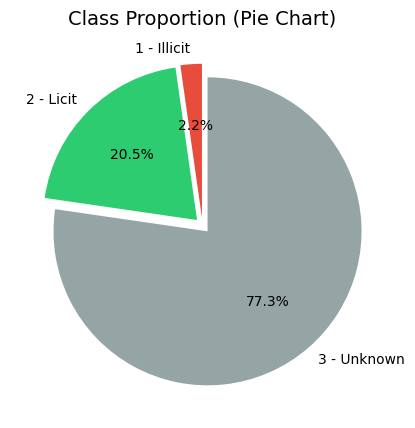

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=["#e74c3c", "#2ecc71", "#95a5a6"],
        startangle=90, explode=(0.05, 0.05, 0.05))
plt.title("Class Proportion (Pie Chart)", fontsize=14)
plt.show()

In [ ]:
print("Target column:", "class")
print("Unique values:", df['class'].unique())


Target column: class
Unique values: [3 2 1]


Highly disproportionate classes. A lot of unknown-labelled transactions.  
The target variable to be predicted is class, which categorizes transactions as illicit (1), licit (2), or unknown (3).
The dataset is strongly imbalanced, with the majority of samples labeled as unknown.  
Let's remeber this characteristic, it influences modeling choices and evaluation metrics in the next parts of the assignment.

Now let's analyze only the numerical features:

In [ ]:
#we only want numeric columns
drop_cols = {"txId", "class", "Time_step"} & set(df.columns)
num_cols = [c for c in df.columns if c not in drop_cols and pd.api.types.is_numeric_dtype(df[c])]
#and calculate basic stats
desc = df[num_cols].describe().T
desc["median"] = df[num_cols].median()
display(desc.sample(5))

zero_var = desc.index[desc["std"] == 0].tolist()
low_var  = desc.index[(desc["std"] > 0) & (desc["std"] < 1e-6)].tolist()

print(f"Total numeric features: {len(num_cols)}")
print(f"Zero-variance features: {len(zero_var)}")
print(f"Near-zero-variance features: {len(low_var)}")


count      mean       std       min       25%  \
Aggregate_feature_48  202804.0 -0.000707  1.000080 -0.975237 -0.975237   
Local_feature_68      202804.0  0.000476  1.000193 -1.316333 -1.316333   
Aggregate_feature_56  202804.0 -0.000437  1.000474 -2.466561 -0.375715   
Aggregate_feature_72  202804.0  0.000225  0.999872 -1.760984 -0.119792   
Local_feature_67      202804.0  0.000541  1.002185 -0.160926 -0.160925   

                           50%       75%        max    median  
Aggregate_feature_48  0.130112  1.340733   1.340733  0.130112  
Local_feature_68      0.580175  0.923516   0.923516  0.580175  
Aggregate_feature_56  0.146997  0.669709   1.715132  0.146997  
Aggregate_feature_72 -0.119792  0.115480   1.521399 -0.119792  
Local_feature_67     -0.160907 -0.160572  29.849695 -0.160907

Total numeric features: 182
Zero-variance features: 0
Near-zero-variance features: 0


The dataset contains 182 numeric features.  
Wait a second! If we run different samples, it seems that:  

*   most stds≈1
*   most means≈0
*   globally, zero Zero-variance features and Near-zero-variance features

The data seems to have been already adjusted in some way. Let's check the paper:  
*“Due to the underlying class imbalance across illicit and licit classes, normalization and standardization transformations are applied.
The augmented features in the transactions dataset and all features in the actors dataset are transformed by scaling each feature using the MinMaxScaler to the range (0,1), reducing imbalance and assisting with model convergence.”  
Although the paper states that only the 17 augmented transaction features were explicitly normalized using MinMaxScaler, we observe that many of the original Elliptic features already appear standardized (mean≈0, std≈1).
Probably, this is because the Elliptic (2019) dataset applied preprocessing techniques before Elliptic++ extended it.
As a result, most numerical features show meaningful variance and no zero-variance or near-zero-variance columns appear in the merged dataset.*

It may be useful for us! Let's just remember this for our dataset statistical analyses and for model training.

### Data Visualization
After having taken a look at all the data provided, we have decided to continue only with transactions (with the classes and features .csv files, not the edgelist at the moment).  
Let's visualize them:

In [ ]:
#subset for graphs
subset_size = 10000
sample_df = df.sample(subset_size, random_state=42) if len(df) > subset_size else df.copy()

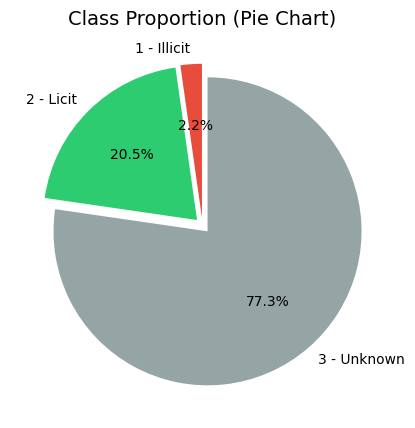

In [ ]:
#target variable distribution (remember)
plt.figure(figsize=(5,5))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=["#e74c3c", "#2ecc71", "#95a5a6"],
        startangle=90, explode=(0.05, 0.05, 0.05))
plt.title("Class Proportion (Pie Chart)", fontsize=14)
plt.show()

As seen before, the dataset is highly imbalanced, dominated by class 3 (unknown), with very few illicit transactions.  
If we take a random numeric feature sample:

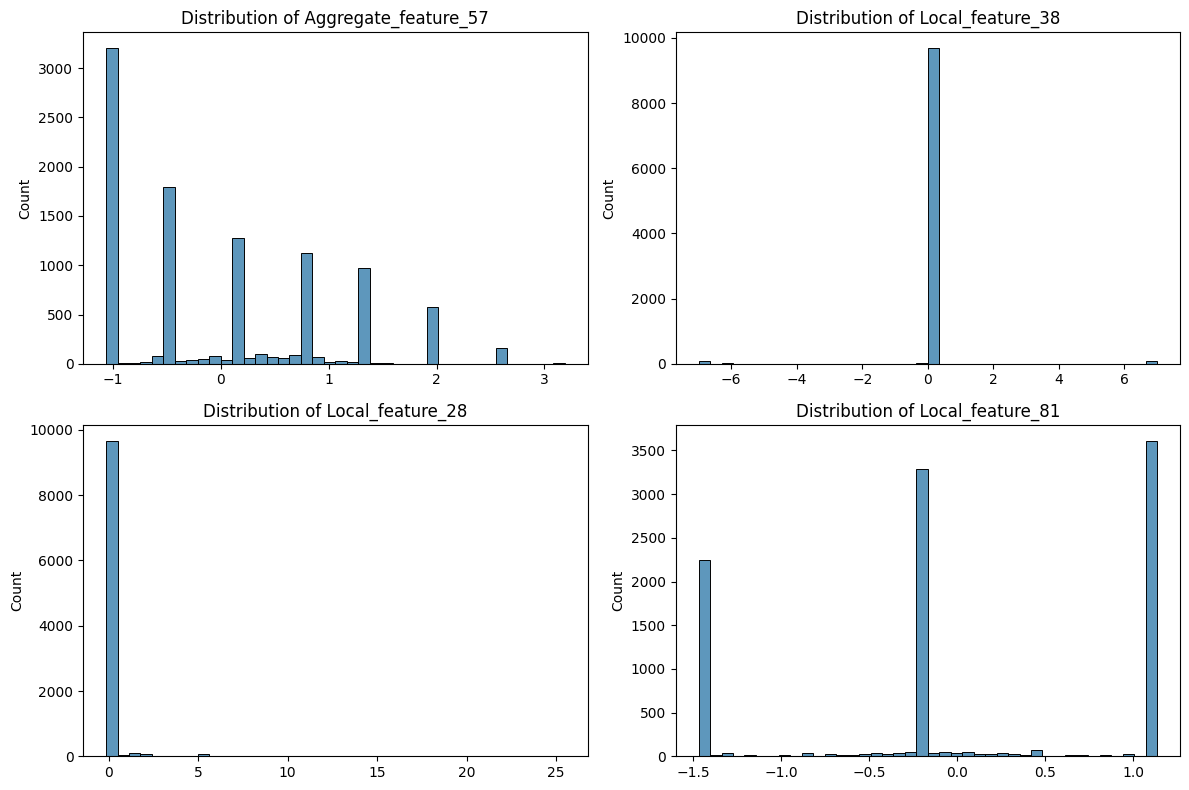

In [ ]:
num_cols = [
    c for c in sample_df.columns
    if c not in ["txId", "class", "Time_step"]
    and pd.api.types.is_numeric_dtype(sample_df[c])
]

n_to_plot = min(4, len(num_cols))
selected = np.random.choice(num_cols, n_to_plot, replace=False)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(selected):
    col_data = sample_df[col].dropna()  # niente NaN
    sns.histplot(col_data, kde=False, bins=40, ax=axes[i],
                 color="#2874A6", edgecolor="black")
    axes[i].set_title(f"Distribution of {col}", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

Most numeric features are already standardized (mean≈1, std≈0), so no obvious outliers or very weird behaviorus are seen graphically. Histograms are not very meaningful for our data readability.   
But we know that there are many ouliers. For example, let's check some features per class (1 local, 1 aggregated, and 1 about Bitcoin flow):

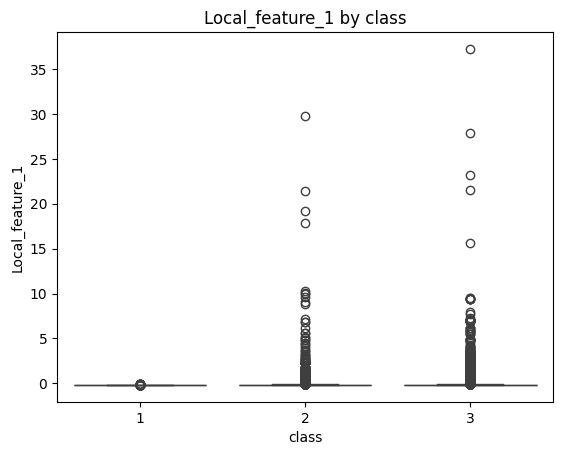

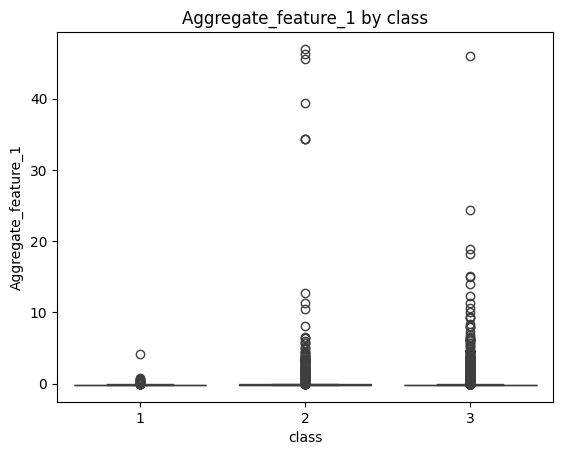

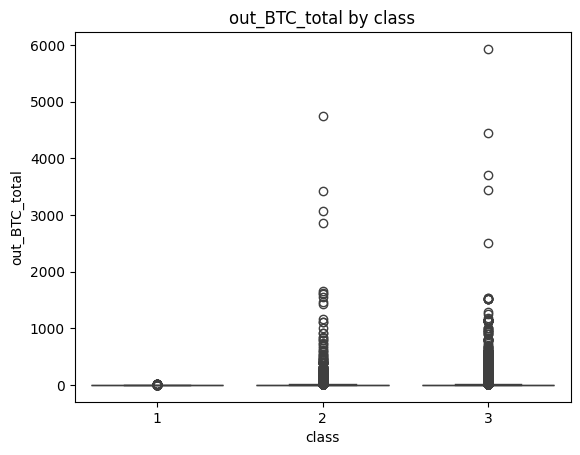

In [ ]:
features = ["Local_feature_1","Aggregate_feature_1","out_BTC_total"]
for f in features:
    sns.boxplot(x="class", y=f, data=df.sample(20000, random_state=42))
    plt.title(f"{f} by class")
    plt.show()


Many outliers especially for licit and unknown transactions.  
The illicit ones seems more "compact" and with lower std, maybe also because the values are far less than the other classes.

Let's see some features stats per class:

In [ ]:
grouped_stats = sample_df.groupby("class")[num_cols].agg(["mean","median","std"])
feature_names = grouped_stats.columns.get_level_values(0).unique()

random_features = np.random.choice(feature_names, 5, replace=False)
cols_to_show = [col for col in grouped_stats.columns if col[0] in random_features]
display(grouped_stats[cols_to_show])


Local_feature_12                     Local_feature_20            \
                  mean    median       std             mean    median   
class                                                                   
1            -0.044173 -0.028741  0.672407        -0.054030 -0.243300   
2            -0.198831 -0.028741  1.420888        -0.249301 -0.243300   
3             0.056062 -0.028741  0.863129         0.079086  0.887058   

                Local_feature_68                     Local_feature_89  \
            std             mean    median       std             mean   
class                                                                   
1      0.637051        -0.185991 -0.196409  0.658481        -0.446249   
2      1.007455         0.041311  0.656150  0.971172         0.583693   
3      0.989814         0.023623  0.923516  1.006607        -0.128977   

                          Aggregate_feature_8                      
         median       std                mean    median       std  
class                                                              
1     -0.757367  0.602339            0.009571  0.015905  0.692830  
2      0.109180  1.354826            0.050130  0.015872  1.014728  
3     -0.536043  0.833995           -0.010223 -0.115150  1.001636

Let's view some more:

In [ ]:
random_features = np.random.choice(feature_names, 5, replace=False)
cols_to_show = [col for col in grouped_stats.columns if col[0] in random_features]
display(grouped_stats[cols_to_show])


Local_feature_12                     Local_feature_27            \
                  mean    median       std             mean    median   
class                                                                   
1            -0.044173 -0.028741  0.672407        -0.004519 -0.012107   
2            -0.198831 -0.028741  1.420888        -0.181841 -0.012107   
3             0.056062 -0.028741  0.863129         0.042372 -0.012107   

                Local_feature_37                         Local_feature_77  \
            std             mean    median           std             mean   
class                                                                       
1      0.705652        -0.026215 -0.026215  1.617648e-07        -0.160391   
2      1.467703         0.075382 -0.026215  8.540219e-01         0.409397   
3      0.831217        -0.025962 -0.026215  8.267009e-03        -0.129656   

                          Local_feature_91                      
         median       std             mean    median       std  
class                                                           
1     -0.264237  0.296931        -0.329589 -0.715614  0.786385  
2     -0.262480  1.476694         0.506289 -0.010499  1.345965  
3     -0.264156  0.650908        -0.116367 -0.502320  0.840350

And some not called "feature":

In [ ]:
filtered_features = [f for f in feature_names if "feature" not in f.lower()]
random_features = np.random.choice(filtered_features, 5, replace=False)
cols_to_show = [col for col in grouped_stats.columns if col[0] in random_features]
display(grouped_stats[cols_to_show])


in_txs_degree                  out_txs_degree                   \
               mean median       std           mean median       std   
class                                                                  
1          0.804651    1.0  0.676009       0.776744    1.0  0.577149   
2          1.838353    1.0  5.814647       1.380522    1.0  6.901967   
3          0.925061    1.0  1.475077       1.178494    1.0  1.901269   

       total_BTC                       num_output_addresses         \
            mean    median         std                 mean median   
class                                                                
1       0.869594  0.141386    2.232294             1.344186    1.0   
2      22.323116  0.499642  100.188178            15.881024    2.0   
3      29.357684  0.762633  138.198079             3.942128    2.0   

                  out_BTC_min                       
              std        mean    median        std  
class                                               
1        0.476211    0.147697  0.052237   0.226094  
2      316.270979    1.104902  0.010842  10.144581  
3       36.915981    0.362395  0.016069   2.161354

Different features have different values, and different classes report different values in different features. For example, it seems that for local and aggreagte features, illicit transactions have usually lower mean than the licit ones, while unknown transactions present uncertain value behavior.  For this features, the median is sometimes the same or similar for all classes. Also, it seems that illicit transactions often have the lowest std, meaning that the feature values are less disperse (it makes sense given that they are also the smallest grouop by a lot).  
Overall, statistics per feature are hard to interpret: we have already seen that in our paper the authors do not describe what the features actually are.  If we look at he [web page for the original dataset made in 2019](https://www.kaggle.com/datasets/ellipticco/elliptic-data-set) the authors literally say:  
*"Due to intellectual property issues, we cannot provide an exact description of all the features in the dataset". We only know that they are derived from the blockchain.*.  
So the only readable columns are therefore the ones about Bitcoin flow; in these we see that licit and unknown transactions have, intuitively, far bigger measures.  These represent the vast majority of the dataset, so it makes sense that they have bigger and more variable measures (i.e.: they move more money).  This behavior is present is all this kind of columns, except for some not representing exactly the money flow, like the feature "fees", which has similar values among the classes.  
So let's try to create a recap-table for the statistical measures for each class:

In [ ]:
#matrixes
means   = df.groupby("class")[num_cols].mean()
medians = df.groupby("class")[num_cols].median()
stds    = df.groupby("class")[num_cols].std()

rows = []

for cls in means.index:  # 1, 2, 3
    # MEAN
    row_mean = means.loc[cls]
    mean_min_feat = row_mean.idxmin()
    mean_min_val  = row_mean.min()
    mean_max_feat = row_mean.idxmax()
    mean_max_val  = row_mean.max()
    rows.append([
        cls, "mean",
        mean_min_feat, mean_min_val,
        mean_max_feat, mean_max_val
    ])

    # MEDIAN
    row_median = medians.loc[cls]
    med_min_feat = row_median.idxmin()
    med_min_val  = row_median.min()
    med_max_feat = row_median.idxmax()
    med_max_val  = row_median.max()
    rows.append([
        cls, "median",
        med_min_feat, med_min_val,
        med_max_feat, med_max_val
    ])

    # STD
    row_std = stds.loc[cls]
    std_min_feat = row_std.idxmin()
    std_min_val  = row_std.min()
    std_max_feat = row_std.idxmax()
    std_max_val  = row_std.max()
    rows.append([
        cls, "std",
        std_min_feat, std_min_val,
        std_max_feat, std_max_val
    ])

summary_df = pd.DataFrame(
    rows,
    columns=[
        "Class",
        "Statistic",
        "Feature_with_lowest_value",
        "Lowest_value",
        "Feature_with_highest_value",
        "Highest_value"
    ]
)

display(summary_df)


Class Statistic Feature_with_lowest_value  Lowest_value  \
0      1      mean      Aggregate_feature_57     -0.630450   
1      1    median      Aggregate_feature_57     -1.059868   
2      1       std          Local_feature_15      0.000000   
3      2      mean          Local_feature_20     -0.252014   
4      2    median      Aggregate_feature_62     -0.470592   
5      2       std                      fees      0.006041   
6      3      mean          Local_feature_53     -0.259141   
7      3    median          Local_feature_89     -0.532528   
8      3       std                      fees      0.002947   

  Feature_with_highest_value  Highest_value  
0                       size     474.487349  
1                       size     192.000000  
2                       size    2906.053576  
3                       size    1071.886675  
4                       size     372.000000  
5                       size    4592.072684  
6                       size     474.750783  
7                       size     226.000000  
8                       size    2063.332337

What does this table tells that may interest us?
Well, we already saw that different features have different behaviors and generally have different values for each class, but we see that the bigger and most volatile feature is size!  
This is interesting: licit transactions are the biggest, while unknown and illicit have similar sizes, and at the same time they have the most variability in sizes.  Maybe illicit transactions occupy less digital space? With this narrow view we can not demonstrate that right now, but let's just remember that size may have a power for separating illicit and licit transactions.

The only categorical feature, Time_step, is useful to see the temporal distribution of the transactions.  
All the literature showcase this step for it being important to see the distribution of the labelled transactions over time, so let us give it a try too:

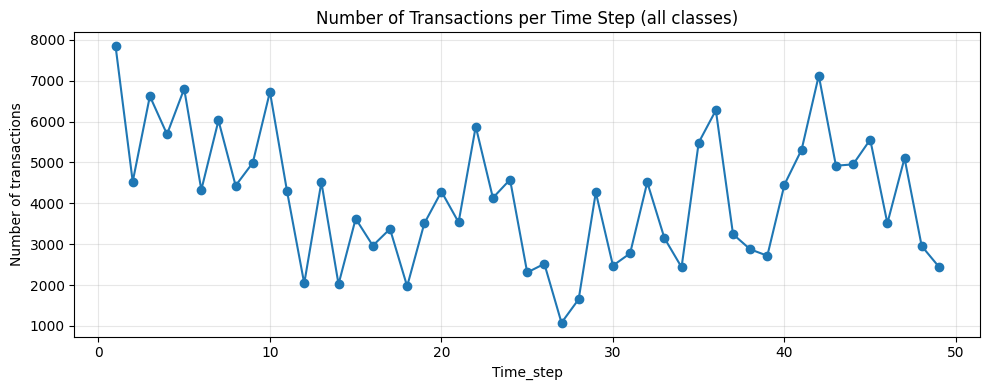

In [ ]:
ts_counts = df["Time_step"].value_counts().sort_index()

plt.figure(figsize=(10, 4))
plt.plot(ts_counts.index, ts_counts.values, marker="o")
plt.title("Number of Transactions per Time Step (all classes)")
plt.xlabel("Time_step")
plt.ylabel("Number of transactions")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

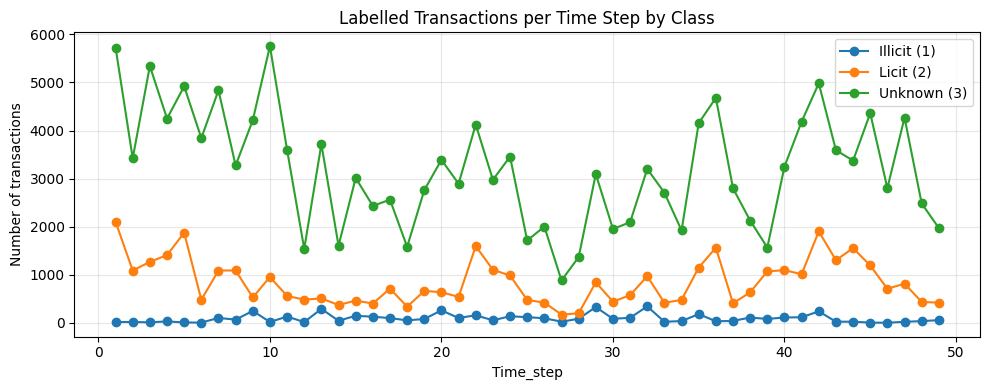

In [ ]:
df_lab = df[df["class"].isin([1, 2, 3])]

per_ts_class = (
    df_lab
    .groupby(["Time_step", "class"])
    .size()
    .unstack(fill_value=0)
    .rename(columns={1: "Illicit", 2: "Licit", 3:"Unknown"})
)

plt.figure(figsize=(10, 4))
plt.plot(per_ts_class.index, per_ts_class["Illicit"], marker="o", label="Illicit (1)")
plt.plot(per_ts_class.index, per_ts_class["Licit"],  marker="o", label="Licit (2)")
plt.plot(per_ts_class.index, per_ts_class["Unknown"],  marker="o", label="Unknown (3)")
plt.title("Labelled Transactions per Time Step by Class")
plt.xlabel("Time_step")
plt.ylabel("Number of transactions")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

The number of transactions varies significantly across time steps.  
Illicit transactions tend to follow smoother low temporal patterns, while licit
transactions are more sparsely distributed but consistently present across
the entire timeline. Unknown transactions show the highest volatility and
dominate most time steps.  
This temporal visualization is important because it highlights how the dataset
evolves over time and additionally confirms that the data is not
identically distributed.  
This supports the choice of a temporal train–test split
and helps us better understand the dynamic behavior of illicit activity in the
Bitcoin network.


We have confirmed that the transactions are not identiaclly distributed.  Are we able to demostrate that the data is also not i.i.d. (i.e. independent nad identically distributed)?
The answer is: as we'll see later, in the blockchain the transactions are connected each to another. Now we can analyze the features of the transctions to see multicollinearity between columns (but not rows).
So let's see the correlations heatmap:

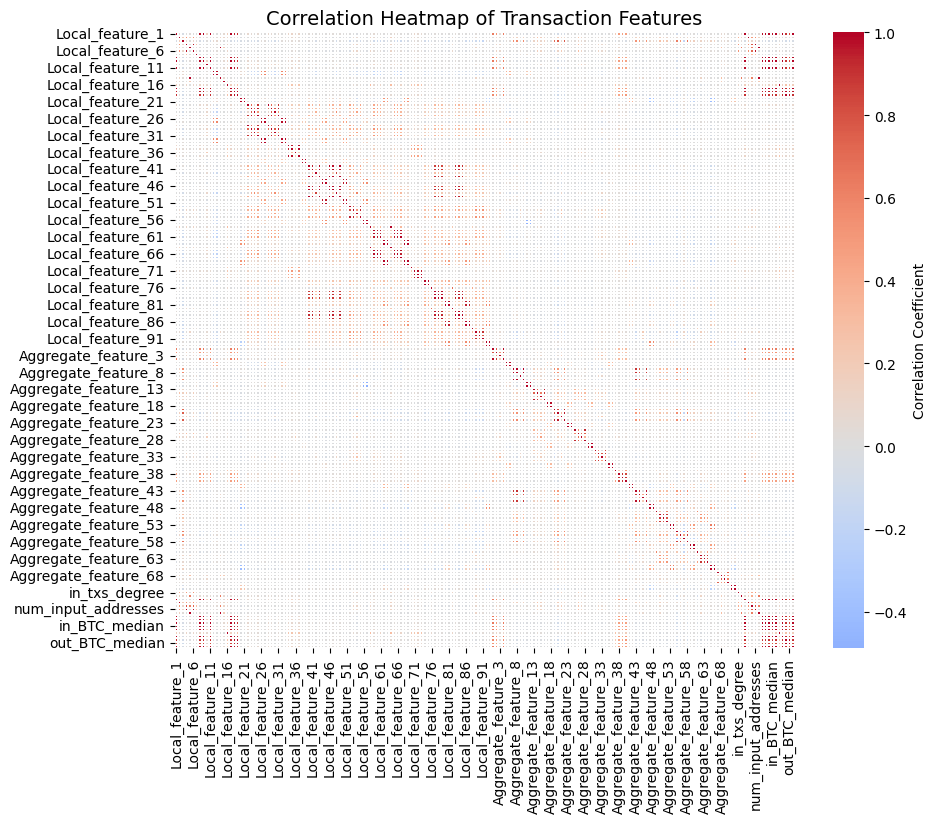

In [ ]:
num_cols = [c for c in df.columns if c not in ["txId", "class", "Time_step"] and pd.api.types.is_numeric_dtype(df[c])]
corr = df[num_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, center=0, linewidths=0.2, cmap="coolwarm",
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Heatmap of Transaction Features", fontsize=14)
plt.show()

A 182x182 square is not particularly readable...  
We should narrow it down since we can't see the particular feature combinations: for example, let's highlight all the (numerical) features pairs that have a very strong correlation (e.g.: > 0.8):

In [ ]:
strong_corr = (
    corr
    .where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
strong_corr.columns = ["Feature_1", "Feature_2", "Correlation"]

strong_corr = strong_corr[strong_corr["Correlation"].abs() > 0.8].sort_values(by="Correlation", ascending=False)

print("Top correlated feature pairs (|corr| > 0.8):")
display(strong_corr)

Top correlated feature pairs (|corr| > 0.8):


Feature_1            Feature_2  Correlation
706     Local_feature_4  num_input_addresses     1.000000
2771   Local_feature_16          out_BTC_min     1.000000
1584    Local_feature_9           in_BTC_max     1.000000
166     Local_feature_1            total_BTC     1.000000
180     Local_feature_1        out_BTC_total     1.000000
...                 ...                  ...          ...
1418    Local_feature_8       out_BTC_median     0.815784
16433        in_BTC_min       out_BTC_median     0.815784
7956   Local_feature_52     Local_feature_53     0.812225
1591    Local_feature_9       out_BTC_median     0.811877
16441        in_BTC_max       out_BTC_median     0.811877

[324 rows x 3 columns]

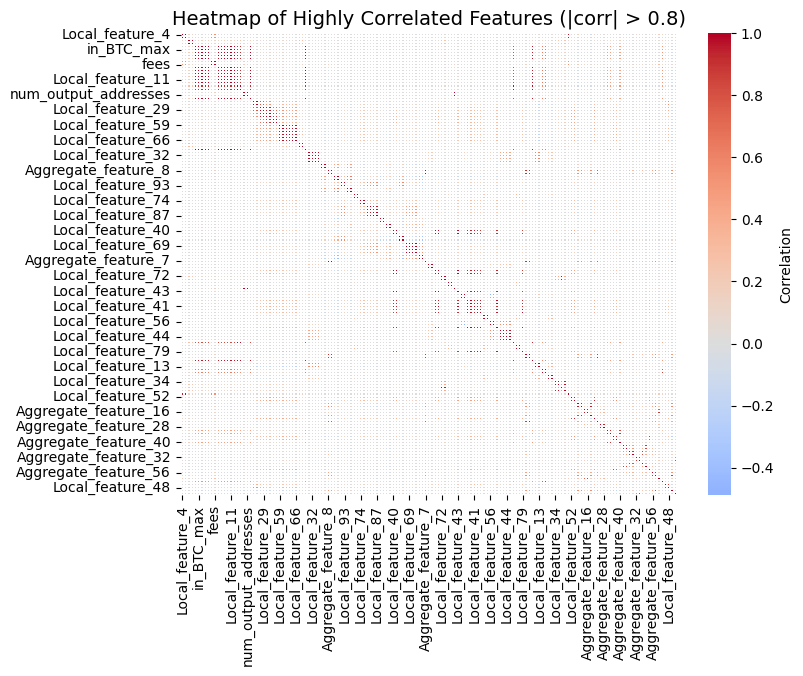

In [ ]:
top_features = pd.unique(strong_corr[["Feature_1", "Feature_2"]].values.ravel())

corr_subset = corr.loc[top_features, top_features]

plt.figure(figsize=(8,6))
sns.heatmap(corr_subset, annot=False, center=0, linewidths=0.2, cmap="coolwarm",
            cbar_kws={'label': 'Correlation'})
plt.title("Heatmap of Highly Correlated Features (|corr| > 0.8)", fontsize=14)
plt.show()

These are also a lot, so we know that we have a lot of correlated features.
Let's visualize the top-20 correlated features:

/tmp/ipython-input-2669395256.py:10: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  top_feats = pd.unique(sol.index.get_level_values(0).tolist() +


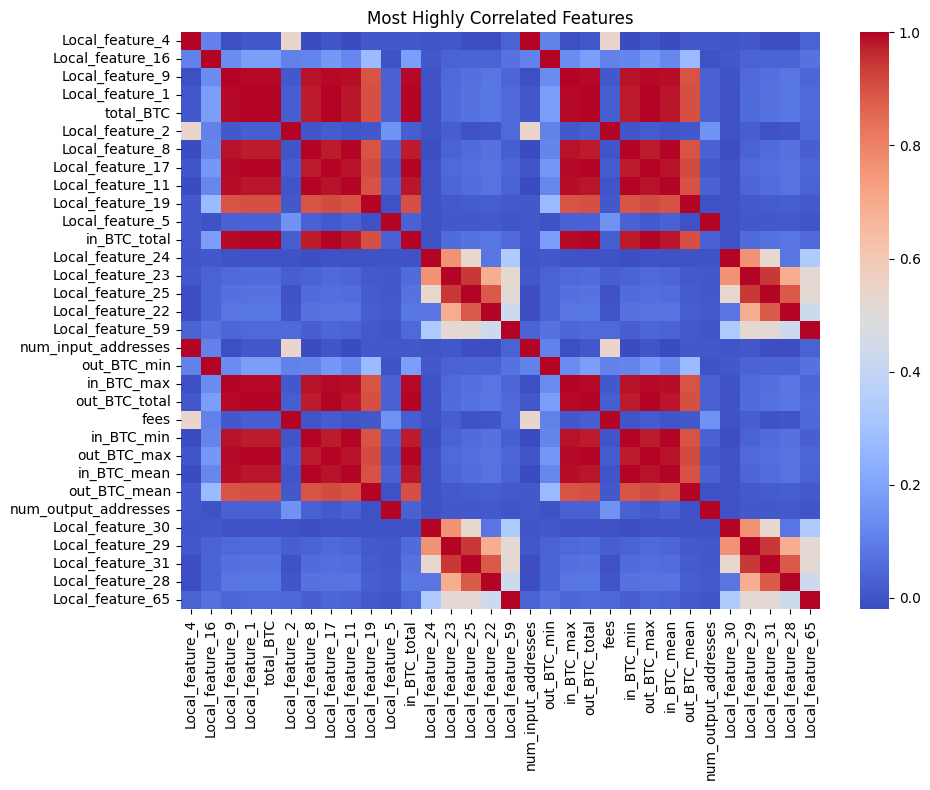

In [ ]:
corr = df[num_cols].corr().abs()

sol = (
    corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
    .head(20)
)

top_feats = pd.unique(sol.index.get_level_values(0).tolist() +
                      sol.index.get_level_values(1).tolist())

plt.figure(figsize=(10,8))
sns.heatmap(df[top_feats].corr(), annot=False, cmap="coolwarm")
plt.title("Most Highly Correlated Features")
plt.tight_layout()
plt.show()

In [ ]:
count_unique = len(pd.unique(top_feats))
print(count_unique)

32


32 unique features are present in the top-20 highest correlated pairs.  
These are also a lot. Let's work on a random small subset with exactly 20 features (not pairs):

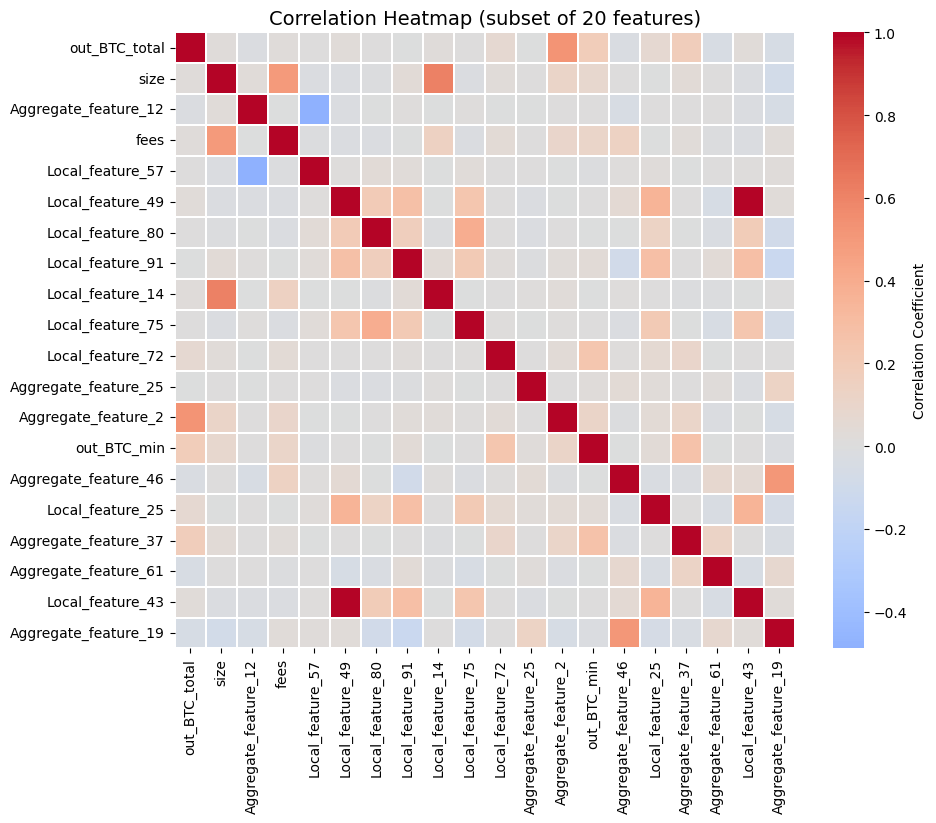

In [ ]:
sample_features = np.random.choice(num_cols, 20, replace=False)
corr_subset = df[sample_features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_subset, center=0, linewidths=0.2, cmap="coolwarm",
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Heatmap (subset of 20 features)", fontsize=14)
plt.show()

Overall, we have a lot of features and many of them present strong correlation.
The different correlation analyses shows more than 300 feature pairs with |corr| > 0.8.  
The strong correlations indicate redundancy among groups of features, but this does not necessarily harm model performance, we'll see which models perform best and why.

### Analyses Recap
*   We will use the joined transaction dataset (features + classes) for our main work. For now, we won't use the wallets datasets or the edgelists.
* We dropped 965 incomplete (licit and unknown) transactions, bringing the polished dataset to have 202804 rows.
*   The dataset identifies each transaction with its txID and present 182 numerical features + the Time_step categorical feature + the class of the transaction.
* Time_step is not a descriptive feature but it is fundamental to visualize the temporal distribution of transactions over time, since the data is naturally time-ordered.
* Transactions are not identically distributed over time steps.
* A transaction is already classified in one of three classes: 1 (illicit), 2 (licit), 3 (unknown). The dataset is very unbalanced with few class 1 and many class 3.
* The data seems to be already standardized and normalized. However, the scaling is not uniform across all feature groups.
* There are many outliers.
* Different types of features have different behaviors of mean, median and standard deviation. Different classes have different features statistical behavior.
* A lot of features present high correlation. Hence, features are not independent each to another.



## Supervised Learning
The literature privileges methods like Random Forest and XGBoost.  
Nevertheless, we are going to experiment with many different supervised learning models, exploting the fact that a portion of our dataset is labelled.  
Hence, we are going to work with only class-1 (illicit) and class-2 (licit) transactions.  
For some models it has deemed necessary to create smaller subsets in order not to explode our hardware (i.e. a Macbook).  
Following the authors' methodologies, we start by preprocessing ALL data (just to be sure):
* Keep only class 1 and 2, define a binary target: y = 1 for illicit (positive), y = 0 for licit (negative), exclude categorical columns.
* Use Time_step for splitting the train-test sets: temporal splits instead of random (1–34 train, 35–49 test).
As we saw in the data visualization part, transactions are distributed differently over Time_steps and evolve over time.
We want to simulate a realistic cybersecurity scenario: learning from past transaction behaviour to predict future illicit activity.  
A random split would mix past and future, cause data leakage (same wallets/structures in both sets), and overestimate performance.  
Moreover, all literature use this kind of split method.
* Feature scaling (MinMax) for sensitive models (linear, kernel, knn, mlp).
* Create a universal "evaluate" function that reports Accuracy, Precision (on the illicit class), Recall (on the illicit class), F1-score and Matthews Correlation Coefficient (MCC, not seen in class but is particularly appropriate for imbalanced binary classification problems such as fraud detection. It measures the differences between actual values and predicted values and goes from -1 to 1, and the closer to 1 the better. Here's the [formula](https://www.statisticshowto.com/matthews-correlation-coefficient/)).

In [ ]:
#keep only class 1 and 2
df_sup = df[df["class"].isin([1, 2])].copy()
#binary target
df_sup["y"] = (df_sup["class"] == 1).astype(int)
#redefine feature columns
feature_cols = [
    c for c in df_sup.columns
    if c not in ["txId", "class", "Time_step", "y"]
    and pd.api.types.is_numeric_dtype(df_sup[c])
]

X = df_sup[feature_cols]
y = df_sup["y"]

#train/test temporal split
TRAIN_MAX_STEP = 34
train_mask = df_sup["Time_step"] <= TRAIN_MAX_STEP
test_mask  = df_sup["Time_step"] >  TRAIN_MAX_STEP

X_train = X[train_mask]
X_test  = X[test_mask]
y_train = y[train_mask]
y_test  = y[test_mask]

#scaling for sensible models
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

def evaluate(model, Xtr, Xte, ytr, yte):
    start = time.time()

    model.fit(Xtr, ytr)
    y_pred = model.predict(Xte)

    end = time.time()
    elapsed = end - start  #seconds

    return {
        "Accuracy":  accuracy_score(yte, y_pred),
        "Precision": precision_score(yte, y_pred, zero_division=0),
        "Recall":    recall_score(yte, y_pred, zero_division=0),
        "F1":        f1_score(yte, y_pred, zero_division=0),
        "MCC":       matthews_corrcoef(yte, y_pred),
        "Time (s)":  elapsed
    }


print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (29699, 182) Test size: (16346, 182)


The dataset has lost thousands of rows (i.e. the unknown transactions), so know we have a more manageable training size.

### Linear Models

#### Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()

res_gnb = evaluate(
    gnb,
    X_train_scaled,
    X_test_scaled,
    y_train,
    y_test
)
res_gnb


{'Accuracy': 0.6921571026550838,
 'Precision': 0.16584870536469792,
 'Recall': 0.9048938134810711,
 'F1': 0.2803203661327231,
 'MCC': np.float64(0.30128637101209116),
 'Time (s)': 0.2026679515838623}

The Gaussian NB assume the features follow a normal ditribution and are conditionally independent from one another.  
Our dataset present the exact opposite characteristics, so it's normal that the results are awful.  
We use it bacause it is fast and easy, and to show that a model with these assumptions can't work well for financial forensics or cybersecurity tasks such as illicit transaction detection.

#### Logistic Regression

In [ ]:
logreg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    n_jobs=-1
)

res_logreg = evaluate(
    logreg,
    X_train_scaled,
    X_test_scaled,
    y_train,
    y_test
)
res_logreg


{'Accuracy': 0.6362412822708919,
 'Precision': 0.1470460153868486,
 'Recall': 0.9353647276084949,
 'F1': 0.25413948820873056,
 'MCC': np.float64(0.27723187963578083),
 'Time (s)': 4.637896537780762}

Logistic Regression is fast and easy to apply, but our dataset has a lot of multicollinearity between features so the coefficients don't work well and this model is sensible to scaling.  
Recall is high because it labels most transactions as illicit (i.e. positive), so false negatives are few.  
This model gives a decent binary split, but the linear boundary is too simple for our dataset.

#### Linear SVM

In [ ]:
linsvm = LinearSVC(
    class_weight="balanced",
    max_iter=5000
)

res_linsvm = evaluate(
    linsvm,
    X_train_scaled,
    X_test_scaled,
    y_train,
    y_test
)
res_linsvm


{'Accuracy': 0.6813899424935764,
 'Precision': 0.16227280170296382,
 'Recall': 0.9150507848568791,
 'F1': 0.2756606397774687,
 'MCC': np.float64(0.2981366943591676),
 'Time (s)': 5.537309646606445}

SVM works well with high dimensionality but has the same problem of all the others linear classifiers: label most transactions as positive and produce a simple linear boundary. This model usually gives a better generalization than the other linear models, but all the performances of these are in the same range.  
Like LR, this model is sensible to scaling.  
Having consolidated that linear models are too simple for our mission, let's move on to unsupervised models.

### Non-Linear Models

We are confident that, given the high-dimensionality, multicollinearity and overall complexity of our dataset, unsupervised models will give better performance than the linears.  
Moreover, we think that the best performances will be given by ensembles models.
We have to find the best tradeoff between training burden (i.e. memory and hardware requirements and time) and performance.

#### Radial Basis Function SVM (Kernelized SVM)

In [ ]:
SUBSET_RBF_SVM = 10000

X_train_rbf = X_train_scaled[:SUBSET_RBF_SVM]
y_train_rbf = y_train[:SUBSET_RBF_SVM]

rbf_svm = SVC(
    kernel="rbf",
    class_weight="balanced"
)

res_rbf = evaluate(
    rbf_svm,
    X_train_rbf,
    X_test_scaled,
    y_train_rbf,
    y_test
)
res_rbf

{'Accuracy': 0.7295362779884987,
 'Precision': 0.1789149672951135,
 'Recall': 0.8587257617728532,
 'F1': 0.2961311893010667,
 'MCC': np.float64(0.30929121890719197),
 'Time (s)': 15.765604972839355}

This kernelized SVM perform better than his linear cousin, because it captures better complex relationships between features and hence draws a more precise boundary.  Unfortunately, the difference in performance is relatively little and the RBF SVM required triple the time and a smaller subset for training.  
This is not ideal, but it is interesting to observe this little delta-perfromance between a linear and non linear model. The RBF SVM would perform better if we used all the dataset, but for now it is not the best model to opt for.


#### K-NN

In [ ]:
SUBSET_KNN = 15000

X_train_knn = X_train_scaled[:SUBSET_KNN]
y_train_knn = y_train[:SUBSET_KNN]

knn = KNeighborsClassifier(
    n_neighbors=15
)

res_knn = evaluate(
    knn,
    X_train_knn,
    X_test_scaled,
    y_train_knn,
    y_test
)
res_knn

{'Accuracy': 0.927321668909825,
 'Precision': 0.31833910034602075,
 'Recall': 0.08494921514312095,
 'F1': 0.13411078717201166,
 'MCC': np.float64(0.13596900893954325),
 'Time (s)': 5.329195261001587}

The first model to achieve an over-90 accuracy is K-NN, but of course the results are misleading.
This model captures well local non-linearities and uses hyperparameters, but is affected by "the curse of dimensionality", is sensible to scaling and requires a subset for training.  
The accuracy is good because it labels everything as licit (negative), as it is also seen in extremely low recall.  
This model can't find illicit transactions, so it is absolutely not suitable for this kind of data.

#### Decision Tree

In [ ]:
dt = DecisionTreeClassifier(
    max_depth=None,
    class_weight="balanced",
    random_state=42
)

res_dt = evaluate(
    dt,
    X_train,
    X_test,
    y_train,
    y_test
)
res_dt

{'Accuracy': 0.9460418450997186,
 'Precision': 0.5764258555133079,
 'Recall': 0.6999076638965835,
 'F1': 0.6321934945788157,
 'MCC': np.float64(0.6066834091500963),
 'Time (s)': 5.525539398193359}

Decision Tree is the most accurate model yet, and presents decent values for all the other indexes.   
It is fast and doesn't require scaling, but it inevitabily present overfitting:

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
start = time.time()
dt.fit(X_train, y_train)
train_time = time.time() - start

y_train_pred = dt.predict(X_train)

train_metrics = {
    "Accuracy":  accuracy_score(y_train, y_train_pred),
    "Precision": precision_score(y_train, y_train_pred, zero_division=0),
    "Recall":    recall_score(y_train, y_train_pred, zero_division=0),
    "F1":        f1_score(y_train, y_train_pred, zero_division=0),
    "MCC":       matthews_corrcoef(y_train, y_train_pred),
}


print("Decision Tree TRAIN metrics:", train_metrics)

Decision Tree TRAIN metrics: {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1': 1.0, 'MCC': np.float64(1.0)}


We notice very high overfitting, so this model is not very good at generalizing what it has memorized/learnt from training.  
The results are nevertheless promising, so why not work with multiple decision trees?

### Ensembles
Ensemble models (Random Forest, Gradient Boosting, XGBoost, LightGBM) capture complex non-linear decision boundaries, multi-feature interactions, and hierarchical patterns that single models cannot learn. They are robust to multicollinearity, outliers, and class imbalance, making them particularly effective in datasets like ours, where illicit behaviour is a subtle deviation within noisy and highly correlated data.


#### Random Forest

In [ ]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight="balanced",
    n_jobs=-1,
    random_state=42
)

res_rf = evaluate(
    rf,
    X_train,
    X_test,
    y_train,
    y_test
)
res_rf

{'Accuracy': 0.9779150862596354,
 'Precision': 0.9918256130790191,
 'Recall': 0.6722068328716528,
 'F1': 0.8013208585580628,
 'MCC': np.float64(0.8068740560275772),
 'Time (s)': 28.50648546218872}

Random forest has the same qualities as Decision Tree but is more robust to overfit and handle feature correlations and outliers better.  
It is the model that overall reports the best results yet: the only noticeable issue is that it is way slower than the others (but we reckon that a minute for training is tolerable).

#### Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier(
    random_state=42
)

res_gb = evaluate(
    gb,
    X_train,
    X_test,
    y_train,
    y_test
)
res_gb

{'Accuracy': 0.9690444145356663,
 'Precision': 0.7899497487437186,
 'Recall': 0.7257617728531855,
 'F1': 0.7564966313763234,
 'MCC': np.float64(0.7407575648071343),
 'Time (s)': 137.2380232810974}

Very good model: it captures complex patterns and doesn't require scaling.  
However, it's slower and a little less performative than RF, but it is a valid alternative.

#### XGBoost

In [ ]:
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    n_jobs=-1,
    random_state=42
)

res_xgb = evaluate(
    xgb,
    X_train,
    X_test,
    y_train,
    y_test
)
res_xgb

{'Accuracy': 0.978404502630613,
 'Precision': 0.9334916864608076,
 'Recall': 0.7257617728531855,
 'F1': 0.8166233766233766,
 'MCC': np.float64(0.8125484216925241),
 'Time (s)': 11.459739446640015}

The best model till now: near perfect accuracy, labels well the data (few FP and not many FN) and takes about 1/3 of RF's training time.
For financial forensics analyses, like the ones we are simulating, FN are more problematic than FP: we want to create models that are able to identify fraudulent activities.
We have assessed that decision trees work well with our dataset, and XGBoost is optimized, robust and fast ensemble of decision trees.   
XGBoost actually draws and effective boundary between the two classes and reaches a recall of about 70%, meaning that it successfully
identifies the majority of illicit transactions.  
Unlike linear models that obtain high recall by over-predicting the positive class, XGBoost achieves high recall together with high F1 and high MCC. This indicates that the model is effectively capturing the complex non-linear decision boundary between licit and illicit behavior, rather than relying on a biased or simplistic rule.

#### LightGBM

In [ ]:
lgb = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    num_leaves=63,
    class_weight="balanced",
    n_jobs=-1,
    random_state=42
)

res_lgb = evaluate(
    lgb,
    X_train,
    X_test,
    y_train,
    y_test
)
res_lgb

[LightGBM] [Info] Number of positive: 3462, number of negative: 26237
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.068444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 41996
[LightGBM] [Info] Number of data points in the train set: 29699, number of used features: 181
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


{'Accuracy': 0.977792732166891,
 'Precision': 0.9176334106728539,
 'Recall': 0.7303785780240074,
 'F1': 0.8133676092544987,
 'MCC': np.float64(0.8076294199861714),
 'Time (s)': 27.779422998428345}

LightGBM, short for Light Gradient-Boosting Machine, is an open-source high-performance framework developed by Microsoft.  
Like XGBoost, it is an ensemble learning framework based on Decision Trees that uses gradient boosting method, but adds different techniques in its algorithm and is usually faster, more precise, lighter than other gradient boosting models and performs very well on large datasets.  
More info can be found [here](https://www.geeksforgeeks.org/machine-learning/lightgbm-light-gradient-boosting-machine/).  
We use it to have a competitor for our best model (XGBoost).  
It has similar performances with its rival, but XGBoost remains better given its better output-resources ratio.  
We reckon that LightGBM reamins a very interesting model to use for financial forensics (maybe it works better on even bigger labelled datasets).   


### Neural Networks

At this point we think we have found the best models, nevertheless we want to exploit NNs to try to find additional non-linear insight about the complex pattern of our data.

#### MLPClassifier

In [ ]:
mlp = MLPClassifier(
    hidden_layer_sizes=(100,),
    max_iter=50,
    random_state=42
)

res_mlp = evaluate(
    mlp,
    X_train_scaled,
    X_test_scaled,
    y_train,
    y_test
)
res_mlp

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


{'Accuracy': 0.9398629634161263,
 'Precision': 0.5420875420875421,
 'Recall': 0.5946445060018467,
 'F1': 0.5671510347864377,
 'MCC': np.float64(0.5355733510376751),
 'Time (s)': 26.512467861175537}

MLP stands for Multi-Layer Perceptron and is a popular NN used for many different non-linear classification tasks such as image recognition and text classification.  
We reckon it is a simple and useful example for the application of a NN to a task like ours.  More info [here](https://www.geeksforgeeks.org/machine-learning/classification-using-sklearn-multi-layer-perceptron/).   
Performance is reasonable and way better than the linear and some non-linear models, so it is able to learn part of the behavior of our data.  It remains less performative than enseble models and suffers the unbalance of our data.

### Supervised Learning Recap

The outcomes are ordered by MCC.   
And the winner is...

In [ ]:
results = pd.DataFrame([
    ("GaussianNB",        res_gnb),
    ("LogisticRegression",res_logreg),
    ("LinearSVM",         res_linsvm),
    ("RBF SVM (subset)",  res_rbf),
    ("KNN (subset)",      res_knn),
    ("Decision Tree",     res_dt),
    ("Random Forest",     res_rf),
    ("Gradient Boosting", res_gb),
    ("XGBoost",           res_xgb),
    ("LightGBM",          res_lgb),
    ("MLP",      res_mlp),
], columns=["Model", "Metrics"])

results_df = pd.concat(
    [results["Model"], results["Metrics"].apply(pd.Series)],
    axis=1
).sort_values(by="MCC", ascending=False)

results_df


Model  Accuracy  Precision    Recall        F1       MCC  \
8              XGBoost  0.978405   0.933492  0.725762  0.816623  0.812548   
9             LightGBM  0.977793   0.917633  0.730379  0.813368  0.807629   
6        Random Forest  0.977915   0.991826  0.672207  0.801321  0.806874   
7    Gradient Boosting  0.969044   0.789950  0.725762  0.756497  0.740758   
5        Decision Tree  0.946042   0.576426  0.699908  0.632193  0.606683   
10                 MLP  0.939863   0.542088  0.594645  0.567151  0.535573   
3     RBF SVM (subset)  0.729536   0.178915  0.858726  0.296131  0.309291   
0           GaussianNB  0.692157   0.165849  0.904894  0.280320  0.301286   
2            LinearSVM  0.681390   0.162273  0.915051  0.275661  0.298137   
1   LogisticRegression  0.636241   0.147046  0.935365  0.254139  0.277232   
4         KNN (subset)  0.927322   0.318339  0.084949  0.134111  0.135969   

      Time (s)  
8    11.459739  
9    27.779423  
6    28.506485  
7   137.238023  
5     5.525539  
10   26.512468  
3    15.765605  
0     0.202668  
2     5.537310  
1     4.637897  
4     5.329195

In [ ]:
metrics = ["Accuracy", "Precision", "Recall", "F1", "MCC"]
for m in metrics:
    idx = results_df[m].idxmax()
    model = results_df.loc[idx, "Model"]
    value = results_df.loc[idx, m]
    print(f"Best {m}: {model} ({value:.4f})")


Best Accuracy: XGBoost (0.9784)
Best Precision: Random Forest (0.9918)
Best Recall: LogisticRegression (0.9354)
Best F1: XGBoost (0.8166)
Best MCC: XGBoost (0.8125)


We confirm that XGBoost is the best model for our task.  
Ensemble models, especially the most recent ones, based on gradient-boosting algorithms, are the best at capturing the behavior of high-dimensional and correlated datasets like ours.
The tree models effectively splits the data features, and boosted algorithms are more accuarte thanks to the creation of many different sequential trees to minimize the loss function.  
These models work on 182 numerical features, but from which ones they gain the most insight for classification?

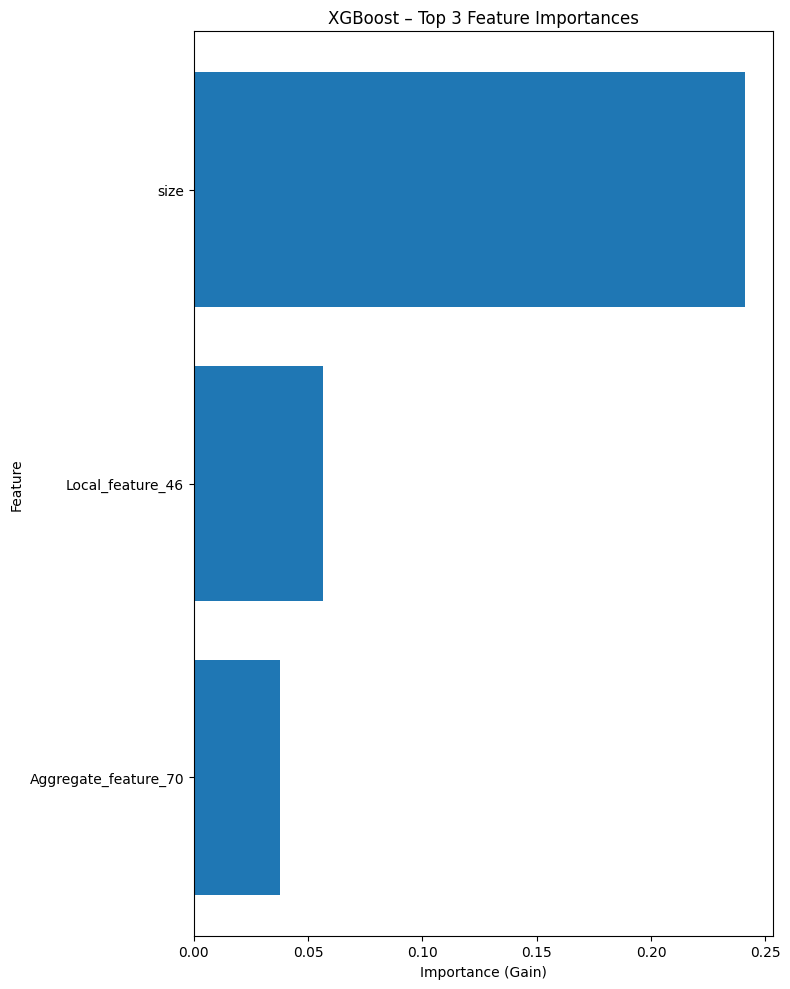

In [ ]:
#XGB
xgb_importances = pd.Series(
    xgb.feature_importances_,
    index=feature_cols
).sort_values(ascending=False)

top_k = 3
top_xgb = xgb_importances.head(top_k)

plt.figure(figsize=(8, 10))
plt.barh(top_xgb.index[::-1], top_xgb.values[::-1])
plt.title("XGBoost – Top 3 Feature Importances")
plt.xlabel("Importance (Gain)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

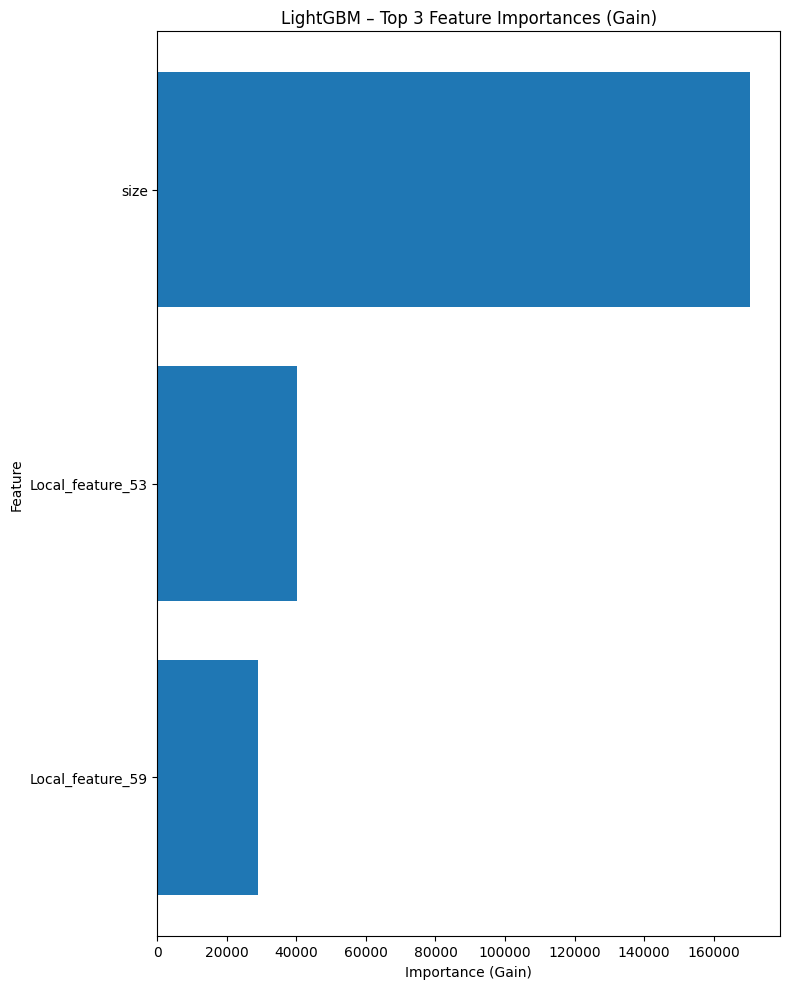

In [ ]:
#LightGBM
lgb_importances = pd.Series(
    lgb.booster_.feature_importance(importance_type='gain'),
    index=feature_cols
).sort_values(ascending=False)

top_k = 3
top_lgb = lgb_importances.head(top_k)

plt.figure(figsize=(8, 10))
plt.barh(top_lgb.index[::-1], top_lgb.values[::-1])
plt.title("LightGBM – Top 3 Feature Importances (Gain)")
plt.xlabel("Importance (Gain)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


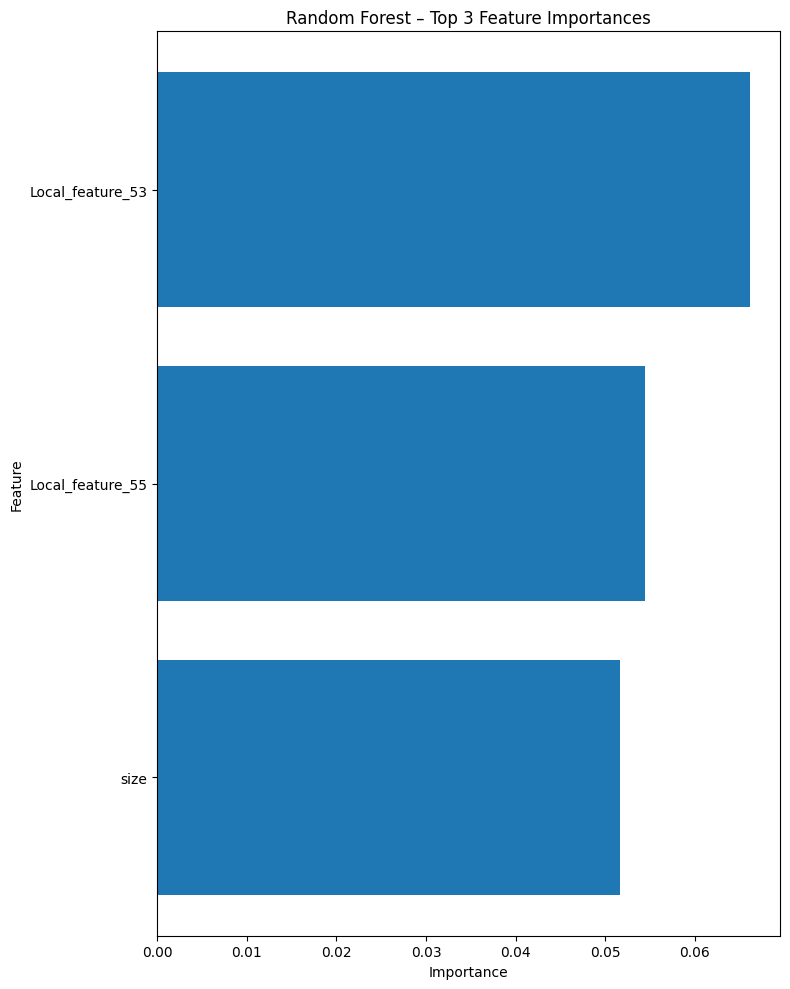

In [ ]:
#RF
rf_importances = pd.Series(
    rf.feature_importances_,
    index=feature_cols
).sort_values(ascending=False)

top_k = 3
top_rf = rf_importances.head(top_k)

plt.figure(figsize=(8, 10))
plt.barh(top_rf.index[::-1], top_rf.values[::-1])
plt.title("Random Forest – Top 3 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()



We see, again, that "size" is very significative. Just to be clear, what is exactly size in our dataset?

In [ ]:
df[df["class"] == 1]["size"].sample(3) #illicit

txId
372960130    192.0
209052847    192.0
154061463    226.0
Name: size, dtype: float64

In [ ]:
df[df["class"] == 2]["size"].sample(3) #licit

txId
72319808     373.0
155669504    226.0
70402162     226.0
Name: size, dtype: float64

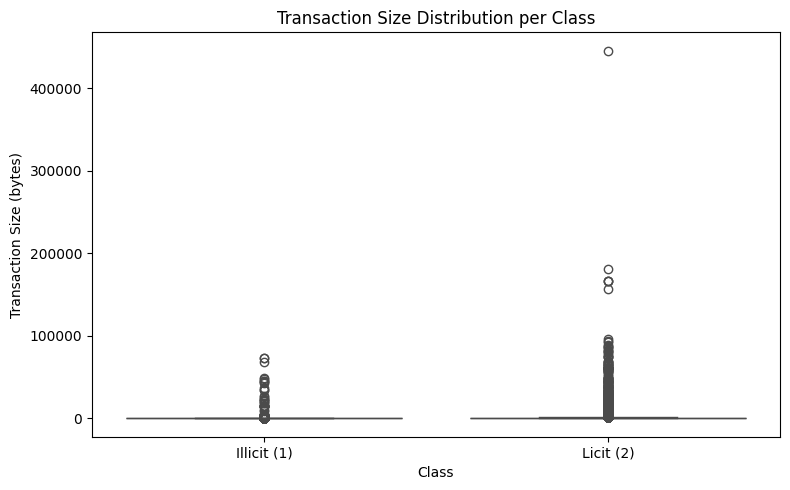

In [ ]:
plt.figure(figsize=(8, 5))

sns.boxplot(
    data=df[df["class"].isin([1, 2])],
    x="class",
    y="size",
    hue="class",
    palette={1:"#e74c3c", 2:"#2ecc71"},
    dodge=False
)

plt.legend([],[], frameon=False)
plt.xticks([0, 1], ["Illicit (1)", "Licit (2)"])

plt.title("Transaction Size Distribution per Class")
plt.xlabel("Class")
plt.ylabel("Transaction Size (bytes)")

plt.tight_layout()
plt.show()

It is the total transaction size in bytes. Putting it simply: each transaction occupy part of a block in the chain, and blocks have maximum byte capacity. The size usually determines how much you have to pay for fees, and it depends on the input and output of the transaction (e.g. signatures, txid of previous transactions). More info [here](https://www.geeksforgeeks.org/software-engineering/blockchain/).   
As theorized before, the models identify "size" as one of the most informative features. This is a very interesting insight that can be explored for further research!


## Unsupervised Learning
Although unsupervised learning can technically be applied to unlabeled data, we do not include class-3 ("unknown") transactions in our clustering analysis also. These points represent the majority of the dataset (≈78%) and we worry that they add noise to our analyses.  
We reckon that the current subset illicit + licit for training (≈30000 transactions) is enough.  
We perform all unsupervised learning on the training portion only (Time_steps 1–34) to avoid temporal leakage, since clustering is still a form of learning.  
We expect poorer performances than supervised learning, since clustering is not usually done on these kind of datasets because they are too complex, but we'll try to extrapolate useful insights for classification.

In [ ]:
X_unsup = X_train_scaled #shape (n_train, n_features)
y_unsup = y_train.values #target  (0=licit, 1=illicit)

print("Unsupervised data shape:", X_unsup.shape)

Unsupervised data shape: (29699, 182)


Hierarchical clustering will not be executed given the dimensionality of the dataset and the limited hardware available (again, an old Macbook Air).  
We will explore whether clustering reveals interpretable behavioural patterns in the transactions and whether cluster-based features could be useful for supervised models.  
For the intrinsic evaluation, we'll calculate :
* The [Silhoutte Score](https://www.geeksforgeeks.org/machine-learning/what-is-silhouette-score/) (A score close to +1 means the data point fits very well in its own cluster and is far from others).
* The [Davies-Bouldin Index](https://www.geeksforgeeks.org/machine-learning/davies-bouldin-index/) (the nearer to 0 the better because it means that the clusters are well-separated and compact. DBI is better than the CHI for us, since DBI just measures cluster neighbor similarity, while CHI assumes convex, well-separated clusters of comparable size.  As we'll see, our clusters absolutely do not satisfy CHI assumptions).  

If we obtain good values for these indexes, we may run extrinsic evaluations to compare the clusters with the labelled data, computing representative measures like:
* [Homogeneity, Completeness, V-measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_completeness_v_measure.html).
* [ARI](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html) and [NMI](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html).  

to see how well clusters match true classes.

### PCA for Dimensionality Reduction
First let's reduce the dimensionality of our subset given that we start with 182 numerical features.  
We run a PCA-10 for creatiung the clusters and a PCA-2 for graph visualization.

In [ ]:
#PCA 10 for clustering
pca_10 = PCA(n_components=10, random_state=42)
X_pca10 = pca_10.fit_transform(X_unsup)

print("Explained variance with 10 PCA components:",
      pca_10.explained_variance_ratio_.sum())

#PCA 2 for graphs
pca_2 = PCA(n_components=2, random_state=42)
X_pca2 = pca_2.fit_transform(X_unsup)

#check shape
X_pca10.shape, X_pca2.shape

Explained variance with 10 PCA components: 0.7022814043937238


((29699, 10), (29699, 2))

We observe that the first 10 principal components explain around 70% of
the total variance, so 10 dimensions are more than sufficient.  
Let's see how it mapped the data:

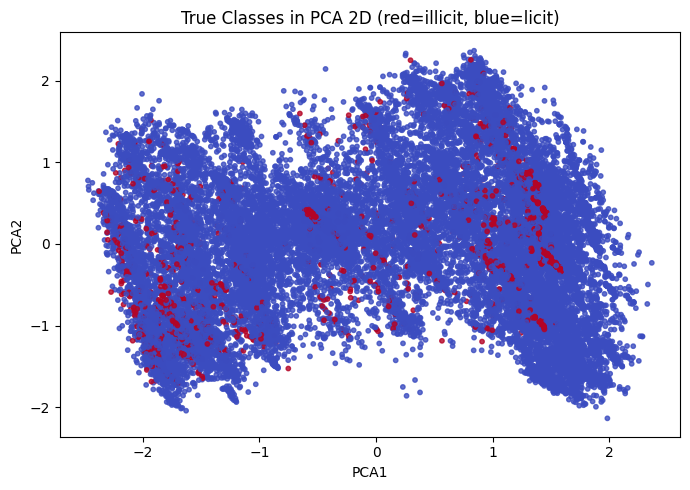

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(X_pca2[:, 0], X_pca2[:, 1],
            c=y_unsup, cmap="coolwarm", s=10, alpha=0.8)
plt.title("True Classes in PCA 2D (red=illicit, blue=licit)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.tight_layout()
plt.show()

Real data follow a chaotic pattern, with illicit and licit transactions  overlapping eachother  
This is another evidence of the complexity of our data and that illicit transactions do not form separated clusters and hence are not easily detectable.  
This kind of analysis (clustering) struggles with this kind of input.  
Nevertheless, let's try to run a couple of different algorithms to look at the outcomes:

#### K-means Clustering (PCA)

We know that K-means Clustering usually works well with large datasets, so we'll experiment with k = 3 (one for each class + one extra) and evaluate the generated clusters.

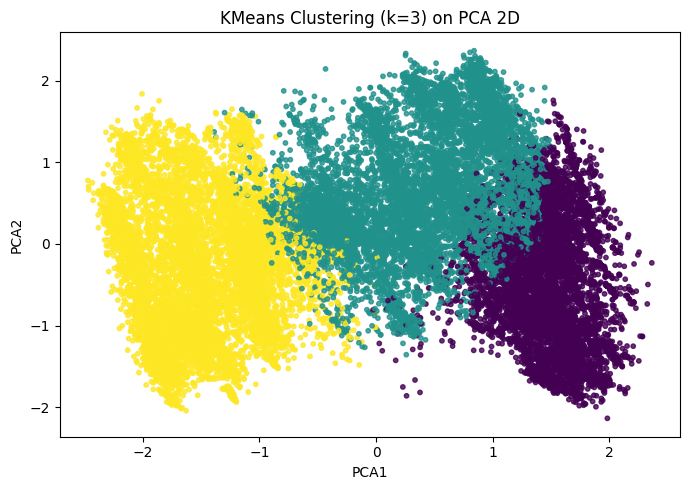

In [ ]:
k = 3  #we put k > n classes
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(X_pca10)

plt.figure(figsize=(7, 5))
plt.scatter(X_pca2[:, 0], X_pca2[:, 1],
            c=clusters_kmeans, cmap="viridis", s=10, alpha=0.8)
plt.title(f"KMeans Clustering (k={k}) on PCA 2D")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.tight_layout()
plt.show()


In [ ]:
sil_kmeans = silhouette_score(X_pca10, clusters_kmeans)
db_kmeans  = davies_bouldin_score(X_pca10, clusters_kmeans)

print("KMeans (k=3) – Silhouette score:", sil_kmeans)
print("KMeans (k=3) – Davies-Bouldin index:", db_kmeans)


KMeans (k=3) – Silhouette score: 0.17476014294091866
KMeans (k=3) – Davies-Bouldin index: 1.7919729116601941


A Silhouette score near to zero and a DBI > 1 indicates that the points do not form well-separated and dense clusters. The points are distributed in a more heterogeneous manner.
Let's see how many transactions per class are allocated in each cluster:

In [ ]:
tab_kmeans = pd.crosstab(y_unsup, clusters_kmeans,
                        rownames=["True class (y: 0=licit, 1=illicit)"],
                        colnames=["KMeans cluster"])
tab_kmeans


KMeans cluster                         0     1     2
True class (y: 0=licit, 1=illicit)                  
0                                   7865  9751  8621
1                                    314  2645   503

The clusters do not represent the real distribution of transactions, but we see that cluster 1 has way more illicit transactions that the others.  
Overall, the k-means with k = 3 isn't able to give a decent classification of transactions.  
Let's try to run a k-means algorithm for each class (with k = 2) to see if more reasonable clusters are generated:

For the Illicit (y=1)

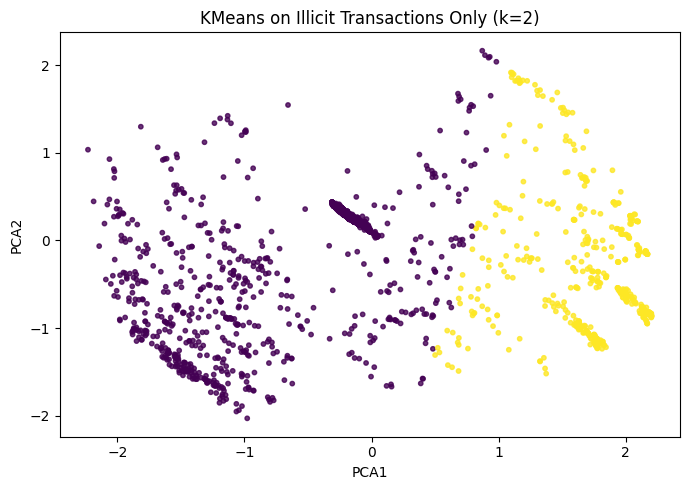

In [ ]:
mask_illicit = (y_unsup == 1)
X_illicit = X_unsup[mask_illicit]

pca_illicit = PCA(n_components=2, random_state=42)
X_illicit_pca2 = pca_illicit.fit_transform(X_illicit)

kmeans_illicit = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters_illicit = kmeans_illicit.fit_predict(X_illicit)

plt.figure(figsize=(7, 5))
plt.scatter(X_illicit_pca2[:, 0], X_illicit_pca2[:, 1],
            c=clusters_illicit, cmap="viridis", s=10, alpha=0.8)
plt.title("KMeans on Illicit Transactions Only (k=2)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.tight_layout()
plt.show()


And for the licit (y=0)

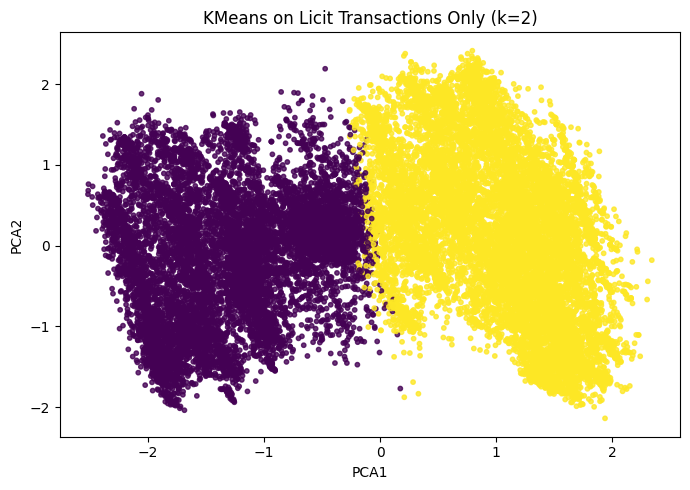

In [ ]:
mask_licit = (y_unsup == 0)
X_licit = X_unsup[mask_licit]

pca_licit = PCA(n_components=2, random_state=42)
X_licit_pca2 = pca_licit.fit_transform(X_licit)

kmeans_licit = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters_licit = kmeans_licit.fit_predict(X_licit)

plt.figure(figsize=(7, 5))
plt.scatter(X_licit_pca2[:, 0], X_licit_pca2[:, 1],
            c=clusters_licit, cmap="viridis", s=10, alpha=0.8)
plt.title("KMeans on Licit Transactions Only (k=2)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.tight_layout()
plt.show()


We can see two clusters for licit transactions: maybe this represents the heterogeneous behavior of them, with a cluster with a positive PCA1 (mock variable) and one with negative.  
The pattern of illicit transactions is more difficult to read, because the dots don't form a clear pattern in the space.
These clustering give us basic knowledge about the nature of our data, but don't add valuable info for our research.


#### DBScan (PCA)
Let's now use a DBScan model to see how "noisy" our dataset actually is.  
Give the results obtained till now, we predict that most of the data points will be classified as noise and the clusterization performance won't be significantly better than the K-means algorithm.  

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=20, n_jobs=-1)
clusters_db = dbscan.fit_predict(X_pca10)

unique_labels, counts_labels = np.unique(clusters_db, return_counts=True)
list(zip(unique_labels, counts_labels)) #list of clusters tuples (label, points), -1 is noise


[(np.int64(-1), np.int64(14621)),
 (np.int64(0), np.int64(4989)),
 (np.int64(1), np.int64(78)),
 (np.int64(2), np.int64(592)),
 (np.int64(3), np.int64(154)),
 (np.int64(4), np.int64(103)),
 (np.int64(5), np.int64(1476)),
 (np.int64(6), np.int64(53)),
 (np.int64(7), np.int64(90)),
 (np.int64(8), np.int64(799)),
 (np.int64(9), np.int64(594)),
 (np.int64(10), np.int64(36)),
 (np.int64(11), np.int64(51)),
 (np.int64(12), np.int64(179)),
 (np.int64(13), np.int64(50)),
 (np.int64(14), np.int64(241)),
 (np.int64(15), np.int64(77)),
 (np.int64(16), np.int64(46)),
 (np.int64(17), np.int64(324)),
 (np.int64(18), np.int64(26)),
 (np.int64(19), np.int64(289)),
 (np.int64(20), np.int64(173)),
 (np.int64(21), np.int64(248)),
 (np.int64(22), np.int64(39)),
 (np.int64(23), np.int64(156)),
 (np.int64(24), np.int64(649)),
 (np.int64(25), np.int64(87)),
 (np.int64(26), np.int64(32)),
 (np.int64(27), np.int64(503)),
 (np.int64(28), np.int64(25)),
 (np.int64(29), np.int64(62)),
 (np.int64(30), np.int64(25)

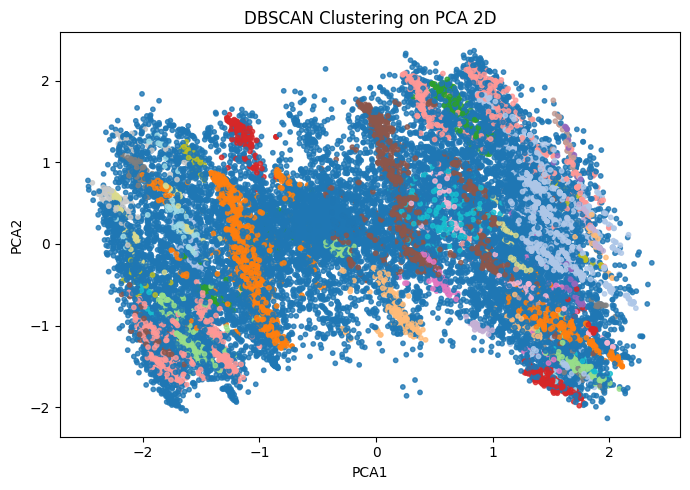

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(X_pca2[:, 0], X_pca2[:, 1],
            c=clusters_db, cmap="tab20", s=10, alpha=0.8) #blue is noise (-1)
plt.title("DBSCAN Clustering on PCA 2D")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.tight_layout()
plt.show()


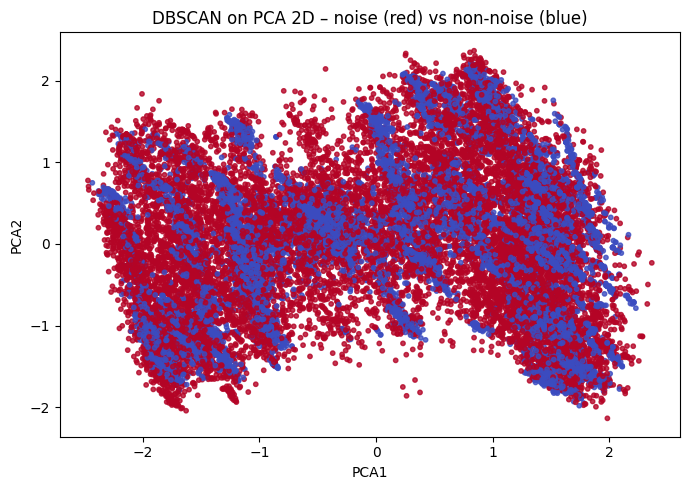

In [ ]:
is_noise = (clusters_db == -1)

plt.figure(figsize=(7, 5))
plt.scatter(
    X_pca2[:, 0],
    X_pca2[:, 1],
    c=is_noise,
    cmap="coolwarm",
    s=10,
    alpha=0.8
)
plt.title("DBSCAN on PCA 2D – noise (red) vs non-noise (blue)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.tight_layout()
plt.show()

In [ ]:
noise = counts_labels[unique_labels == -1]
noise_ratio = (noise/29699)*100

def noisy():
  print(noise, 'points are noise, so it is about', noise_ratio,'% of the subset')
  if noise_ratio > 20:
    print ('and, as we expected, it is a lot of noise')

  else:
    print('so maybe it was not that noisy...')

noisy()

[14621] points are noise, so it is about [49.23061383] % of the subset
and, as we expected, it is a lot of noise


In [ ]:
valid_mask = clusters_db != -1  #noise = -1

if len(np.unique(clusters_db[valid_mask])) > 1:
    sil_db = silhouette_score(X_pca10[valid_mask], clusters_db[valid_mask])
    db_db  = davies_bouldin_score(X_pca10[valid_mask], clusters_db[valid_mask])
    print("DBSCAN – Silhouette score:", sil_db)
    print("DBSCAN – Davies-Bouldin index:", db_db)


DBSCAN – Silhouette score: 0.2775734883252716
DBSCAN – Davies-Bouldin index: 0.9755299060569442


In [ ]:
if sil_db > sil_kmeans:
  print('We achieved a better S-score thank k-means!')
else:
  print('no progress for S-score :(')

if abs(db_db) < abs(db_kmeans):
  print('We achieved a better DBI than k-means!')
else:
  print('no progress for DBI :(')

We achieved a better S-score thank k-means!
We achieved a better DBI than k-means!


A lava lake of noise floods all over the citadel composed by normal points!  
The scores are a little better than the k-means, but as we can see even DBScan struggles to identify clear clusters.  
However, with this algorithm we can see that about half of our subset is noise: transactions seems to distribute themselves in an irregular pattern, apparently forming different little clusters (i.e. the colorful clouds).  
These clusters are difficult to interpret, but we made little progress from k-means interpretation.

In [ ]:
tab_dbscan = pd.crosstab(y_unsup, clusters_db,
                        rownames=["True class (y: 0=licit, 1=illicit)"],
                        colnames=["DBSCan cluster"])
tab_dbscan

DBSCan cluster                        -1     0    1    2    3    4     5   \
True class (y: 0=licit, 1=illicit)                                          
0                                   14119  2738   76  592  154   89  1179   
1                                     502  2251    2    0    0   14   297   

DBSCan cluster                       6    7    8   ...   61   62   63   64  \
True class (y: 0=licit, 1=illicit)                 ...                       
0                                    53   90  775  ...   78  111   22   21   
1                                     0    0   24  ...    0    0    0    0   

DBSCan cluster                       65   66   67   68   69   70  
True class (y: 0=licit, 1=illicit)                                
0                                   102   31   62   43   12   11  
1                                     0    0    1    0    1    5  

[2 rows x 72 columns]

### UMAP for Dimensionality Reduction
After having tried different clustering algorithms with little practical success, we try to take a different approach.  
Maybe the problem is not the clustering algorithm, but the dimensionality reduction: doing a PCA-10 on a 182-dimensions datasets may over-simplify the complex nature of the data.  
Instead of trying a higher dimensions PCA, which may give similar results, we want to try a different powerful dimension reduction technique: [UMAP](https://www.geeksforgeeks.org/machine-learning/umap-uniform-manifold-approximation-and-projection/).  
The Uniform Manifold Approximation and Projection (UMAP) aims to reduce the dimensionality of data while preserving its topological structure. It is particularly useful for visualizing high-dimensional datasets in a low-dimensional space, so it is a reasonable alternative.  
Let's how it maps the data:

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


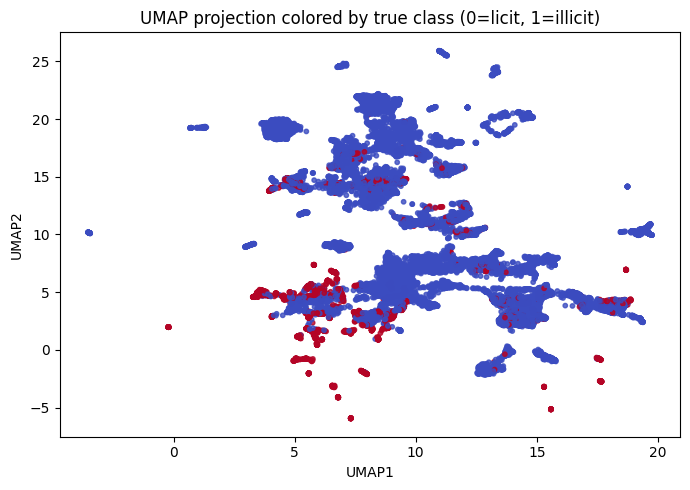

In [ ]:
umap_2 = umap.UMAP(
    n_neighbors=30, min_dist=0.1, random_state=42
)

X_umap2 = umap_2.fit_transform(X_unsup)

plt.figure(figsize=(7,5))
plt.scatter(X_umap2[:, 0], X_umap2[:, 1],
            c=y_unsup, cmap="coolwarm", s=10, alpha=0.8)
plt.title("UMAP projection colored by true class (0=licit, 1=illicit)")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.tight_layout()
plt.show()

The data still present chaotic behavior with overlapping transactions, but the structure is visibly different.  
The issue of the hard interpretability due to the 2D representation of a 182D dataset is still present, but maybe we can obtain better outcomes with the same algorithms (k-means 3 and DBScan) - let's check!

#### K-means Clustering (UMAP)

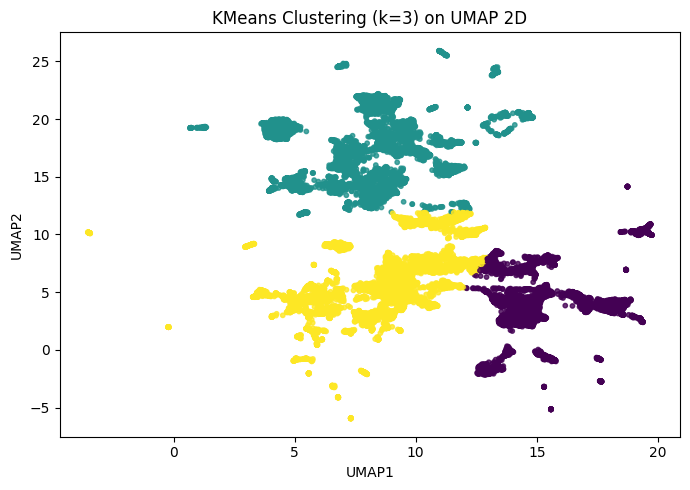

In [ ]:
clusters_kmeans_umap = kmeans.fit_predict(X_umap2)

plt.figure(figsize=(7,5))
plt.scatter(X_umap2[:, 0], X_umap2[:, 1],
            c=clusters_kmeans_umap, cmap="viridis", s=10, alpha=0.8)
plt.title("KMeans Clustering (k=3) on UMAP 2D")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.tight_layout()
plt.show()


In [ ]:
sil_kmeans1 = silhouette_score(X_umap2, clusters_kmeans_umap)
db_kmeans1  = davies_bouldin_score(X_umap2, clusters_kmeans_umap)

print("KMeans (k=3) – Silhouette score:", sil_kmeans1)
print("KMeans (k=3) – Davies-Bouldin index:", db_kmeans1)

KMeans (k=3) – Silhouette score: 0.46471453
KMeans (k=3) – Davies-Bouldin index: 0.8492901471120291


In [ ]:
if sil_kmeans1 > sil_kmeans:
  print('We achieved a better S-score than the PCA k-means!')
else:
  print('no progress for S-score :(')

if abs(db_kmeans1) < abs(db_kmeans):
  print('We achieved a better DBI than the PCA k-means!')
else:
  print('no progress for DBI :(')

We achieved a better S-score than the PCA k-means!
We achieved a better DBI than the PCA k-means!


Geometrically speaking, we created better clusters, but we can clearly see that these clusters do not represent the real distribution of the licit and illicit transactions.  
If we do a quick check:

In [ ]:
tab_kmeans1 = pd.crosstab(y_unsup, clusters_kmeans_umap,
                        rownames=["True class (y: 0=licit, 1=illicit)"],
                        colnames=["KMeans cluster"])
tab_kmeans1

KMeans cluster                         0      1     2
True class (y: 0=licit, 1=illicit)                   
0                                   7298  11290  7649
1                                    606    569  2287

The cluster 2 is the most illicit-dense, but the result are the same: no clear separation of the classes.

#### DBScan (UMAP)

In [ ]:
clusters_db_umap = dbscan.fit_predict(X_umap2)
unique_labels1, counts_labels1 = np.unique(clusters_db_umap, return_counts=True)
noise = counts_labels1[unique_labels1 == -1]
noise_ratio = (noise/29699)*100

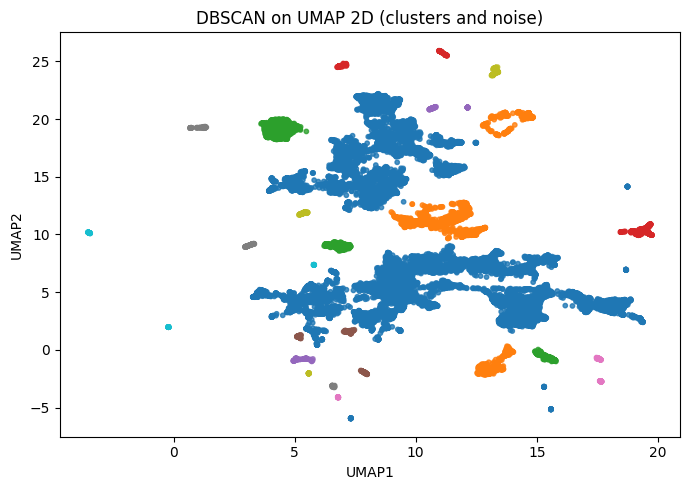

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(
    X_umap2[:, 0], X_umap2[:, 1], c=clusters_db_umap, cmap="tab10", s=10, alpha=0.8
)
plt.title("DBSCAN on UMAP 2D (clusters and noise)")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.tight_layout()
plt.show()

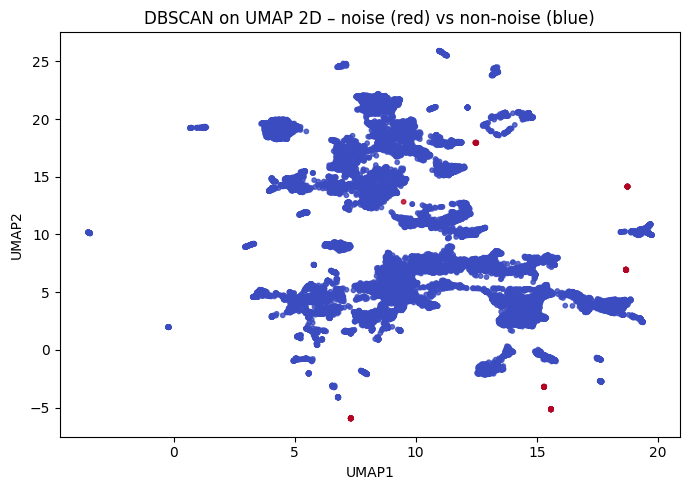

In [ ]:
is_noise1 = (clusters_db_umap == -1)

plt.figure(figsize=(7, 5))
plt.scatter(
    X_umap2[:, 0],
    X_umap2[:, 1],
    c=is_noise1,
    cmap="coolwarm",
    s=10,
    alpha=0.8
)
plt.title("DBSCAN on UMAP 2D – noise (red) vs non-noise (blue)")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.tight_layout()
plt.show()

In [ ]:
valid_mask1 = clusters_db_umap != -1  #noise = -1

if len(np.unique(clusters_db_umap[valid_mask1])) > 1:
    sil_db1 = silhouette_score(X_umap2[valid_mask1], clusters_db_umap[valid_mask1])
    db_db1  = davies_bouldin_score(X_umap2[valid_mask1], clusters_db_umap[valid_mask1])
    print("DBSCAN – Silhouette score:", sil_db1)
    print("DBSCAN – Davies-Bouldin index:", db_db1)

DBSCAN – Silhouette score: 0.02377996
DBSCAN – Davies-Bouldin index: 0.5327651016373178


In [ ]:
if sil_db1 > sil_db:
  print('We achieved a better S-score than the PCA DBScan!')
else:
  print('no progress for S-score :(')

if abs(db_db1) < abs(db_db):
  print('We achieved a better DBI than the PCA DBScan!')
else:
  print('no progress for DBI :(')

no progress for S-score :(
We achieved a better DBI than the PCA DBScan!


Now it looks like a geographical map of a Europe-like continent!
Let's see how many "capitol cities" are highlighted with red dots:

In [ ]:
noisy()

[87] points are noise, so it is about [0.29293916] % of the subset
so maybe it was not that noisy...


The different geometry "tricks" the DBScan to detect very few noise points and different clusters.    
Even though we achieved the best DBI (with a very low SS though) no clearly meaningful clusters are originated: the graph doesn't aid us in separating licit and illict transactions.

In [ ]:
tab_umap1 = pd.crosstab(y_unsup, clusters_db_umap,
                        rownames=["True class (y: 0=licit, 1=illicit)"],
                        colnames=["DBSCan cluster"])
tab_umap1

DBSCan cluster                      -1     0      1    2     3    4    5   \
True class (y: 0=licit, 1=illicit)                                          
0                                    21  8505  10945  436  1864  943  416   
1                                    66   489   2133    0   207    4    0   

DBSCan cluster                       6     7    8   ...   19   20   21   22  \
True class (y: 0=licit, 1=illicit)                  ...                       
0                                   464  1443  138  ...    4    0  114   92   
1                                    15     0    0  ...   51   64    0    0   

DBSCan cluster                       23   24   25   26   27   28  
True class (y: 0=licit, 1=illicit)                                
0                                    87  125    0    0   89    0  
1                                     0    0   23   22    0   26  

[2 rows x 30 columns]

Like the previous algorithms, there are more "liciter" clusters than others, but no net separation.

### UL for Feature Engineering
Having assessed that unsupervised algorithms do not give satisfying results per se, we want to try to exploit them for creating additional features for our most performative supervised models.  
The possibilities are many, so let's start from what we have learnt with these algorithms:
* Our data present a chaotic heterogeneous behavior not forming regular clusters.
* Illicit transactions appear more scattered/irregular.
* The data is noisy (in PCA10)

Let's try to build features from these assumptions, working with the PCA10 output (because it's appears more readable than the UMAP's).

In [ ]:
#define pca10 train/test
X_train_pca10 = pca_10.fit_transform(X_train)
X_test_pca10  = pca_10.transform(X_test)
#define new train-test df
X_train_df1 = pd.DataFrame(X_train, columns=feature_cols, index=df_sup.index[train_mask])
X_test_df1  = pd.DataFrame(X_test,  columns=feature_cols, index=df_sup.index[test_mask])

#### Feature 1: Distance to nearest centroid
Having seen the difference of distribution of the point on the plane based on its class in the k-means graphs, theoretically illicit transactions should usually be geometrically further away from the cluster centroid than the licit ones. A higher 'dist_nc' value should indicate that the transactions is probably illicit.  
This feature answer the question: how far is this transaction from the licit-centre?


In [ ]:
#another kmeans for dist_c
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(X_pca10)
#dist_nc
train_dist = kmeans.transform(X_train_pca10).min(axis=1)
test_dist  = kmeans.transform(X_test_pca10).min(axis=1)

Let's attach it to our supervised dataframe and see some examples:

In [ ]:
X_train_df1["dist_c"] = train_dist
X_test_df1["dist_c"]  = test_dist

X_train_df1["dist_c"].head()


txId
68869         131.786958
89273      444480.605531
293323        726.300108
1494462       726.318555
1582950       758.274970
Name: dist_c, dtype: float64

It works - it should represent the geometric distance.  
The first two transactions appear less illicit-probable than the other 3.

#### Feature 2: Noise label
The PCA DBScan analysis shows us that about half of the dataset is noisy. We could exploit this info to create a binary categorical feature (0-1) to signal noise points. A noise point ("is noise") is an outlier.
This feature answers the question: is the point located in low density regions (i.e.: is this point noise?).

In [ ]:
X_all_pca10 = np.vstack([X_train_pca10, X_test_pca10])
#DBScan variables again just to be sure
dbscan_pca10 = DBSCAN(eps=0.5, min_samples=20, n_jobs=-1)
db_labels_all = dbscan_pca10.fit_predict(X_all_pca10)   # -1 = noise
#noise indicator 0/1
db_noise_all = (db_labels_all == -1).astype(int)
#Split train/test per position
n_train = X_train_pca10.shape[0]
n_test  = X_test_pca10.shape[0]
train_noise = db_noise_all[:n_train]
test_noise  = db_noise_all[n_train:n_train + n_test]

X_train_df1["isnoisy"] = train_noise
X_test_df1["isnoisy"]  = test_noise

Let's see if it seems correct:

In [ ]:
X_train_df1["isnoisy"] = train_noise
X_test_df1["isnoisy"]  = test_noise
X_train_df1["isnoisy"].head()

txId
68869      1
89273      1
293323     0
1494462    1
1582950    0
Name: isnoisy, dtype: int64

Yes. We can see three noise points and two "quiet".

#### Updated Supervised Learning
 Let's do a last check of the updated train/test sets:

In [ ]:
X_train_df1.head()

Local_feature_1  Local_feature_2  Local_feature_3  Local_feature_4  \
txId                                                                          
68869          -0.114267        -0.184668        -1.201369         0.028105   
89273           5.202107        -0.210553        -1.756361        -0.121970   
293323         -0.172726        -0.184668        -1.201369        -0.121970   
1494462        -0.172921        -0.158783        -1.201369        -0.121970   
1582950        -0.169967        -0.184668        -1.201369        -0.121970   

         Local_feature_5  Local_feature_6  Local_feature_7  Local_feature_8  \
txId                                                                          
68869          -0.043875        -0.113002         0.547008        -0.161652   
89273         260.090707        -0.113002        -0.061584         5.335864   
293323         -0.043875        -0.113002        -0.061584        -0.163383   
1494462        -0.043875        -0.113002        -0.061584        -0.163581   
1582950        -0.043875        -0.113002        -0.061584        -0.160559   

         Local_feature_9  Local_feature_10  ...  in_BTC_mean  in_BTC_median  \
txId                                        ...                               
68869          -0.118555          0.300047  ...     3.102967       1.000000   
89273           5.252974         -0.049707  ...   852.164680     852.164680   
293323         -0.169201         -0.049707  ...     0.040774       0.040774   
1494462        -0.169397         -0.049707  ...     0.010000       0.010000   
1582950        -0.166417         -0.049707  ...     0.478277       0.478277   

         in_BTC_total   out_BTC_min  out_BTC_max  out_BTC_mean  \
txId                                                             
68869        9.308900  1.229000e+00     8.079800      4.654400   
89273      852.164680  1.300000e-07    41.264036      0.065016   
293323       0.040774  9.480000e-04     0.039726      0.020337   
1494462      0.010000  2.900000e-03     0.006900      0.004900   
1582950      0.478277  4.630000e-02     0.431877      0.239088   

         out_BTC_median  out_BTC_total         dist_c  isnoisy  
txId                                                            
68869          4.654400       9.308800     131.786958        1  
89273          0.000441     852.164680  444480.605531        1  
293323         0.020337       0.040674     726.300108        0  
1494462        0.004900       0.009800     726.318555        1  
1582950        0.239088       0.478177     758.274970        0  

[5 rows x 184 columns]

In [ ]:
X_test_df1.head()

Local_feature_1  Local_feature_2  Local_feature_3  Local_feature_4  \
txId                                                                          
1813992         0.105156         3.567919         2.128587         2.129156   
2234847        -0.145665         1.426546         1.018602         0.328255   
2364754         3.082796         0.725145         1.573595        -0.121970   
2365784         1.225826         0.725243         1.018602        -0.121970   
2503693         0.082972        -0.098988        -0.091383        -0.121970   

         Local_feature_5  Local_feature_6  Local_feature_7  Local_feature_8  \
txId                                                                          
1813992         0.869227         2.235141         0.242712        -0.162415   
2234847         0.750126         0.390171        -0.061584        -0.163523   
2364754         0.551626        -0.113002        -0.061584         3.167519   
2365784         0.650876        -0.113002        -0.061584         1.267565   
2503693        -0.043875        -0.113002        -0.061584         0.098236   

         Local_feature_9  Local_feature_10  ...  in_BTC_mean  in_BTC_median  \
txId                                        ...                               
1813992        -0.111938          0.096786  ...     1.422922       0.950000   
2234847        -0.150857          0.036852  ...     0.619598       0.083000   
2364754         3.115018         -0.049707  ...   516.173447     516.173447   
2365784         1.241693         -0.049707  ...   221.770279     221.770279   
2503693         0.088751         -0.049707  ...    40.579376      40.579376   

         in_BTC_total  out_BTC_min  out_BTC_max  out_BTC_mean  out_BTC_median  \
txId                                                                            
1813992     44.110569     0.000590    35.000000      0.918666        0.017152   
2234847      4.337184     0.000377     1.760000      0.103116        0.000854   
2364754    516.173447     0.000850   496.405518     16.130307        0.105650   
2365784    221.770279     0.001673   143.293658      5.993694        0.099634   
2503693     40.579376     0.108300    40.470645     20.289472       20.289472   

         out_BTC_total       dist_c  isnoisy  
txId                                          
1813992      44.095972  9768.953289        1  
2234847       4.330860  2500.122339        1  
2364754     516.169832  1445.526519        1  
2365784     221.766664   718.929622        1  
2503693      40.578945   762.854031        1  

[5 rows x 184 columns]

Now we have 184 features (182 + the new engineered ones).  
Now let's rerun our best models (XGBoost, LighGBM, RF) and see if we obtain better results.

In [ ]:
#XGBoost
res_xgb_fe = evaluate(
    xgb,
    X_train_df1,
    X_test_df1,
    y_train,
    y_test
)

print("Old result:",
      res_xgb)
print("New result:",
      res_xgb_fe)


Old result: {'Accuracy': 0.978404502630613, 'Precision': 0.9334916864608076, 'Recall': 0.7257617728531855, 'F1': 0.8166233766233766, 'MCC': np.float64(0.8125484216925241), 'Time (s)': 11.459739446640015}
New result: {'Accuracy': 0.9778539092132632, 'Precision': 0.9216374269005848, 'Recall': 0.7276084949215144, 'F1': 0.8132094943240454, 'MCC': np.float64(0.8079437016545394), 'Time (s)': 12.352880477905273}


In [ ]:
#LightGBM
res_lgb_fe = evaluate(
    lgb,
    X_train_df1,
    X_test_df1,
    y_train,
    y_test
)

print("Old result:",
      res_lgb)
print("New result:",
      res_lgb_fe)

[LightGBM] [Info] Number of positive: 3462, number of negative: 26237
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080366 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 42253
[LightGBM] [Info] Number of data points in the train set: 29699, number of used features: 183
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Old result: {'Accuracy': 0.977792732166891, 'Precision': 0.9176334106728539, 'Recall': 0.7303785780240074, 'F1': 0.8133676092544987, 'MCC': np.float64(0.8076294199861714), 'Time (s)': 27.779422998428345}
New result: {'Accuracy': 0.978404502630613, 'Precision': 0.927400468384075, 'Recall': 0.7313019390581718, 'F1': 0.8177594217862674, 'MCC': np.float64(0.8128850874307669), 'Time (s)': 27.97797179222107}


In [ ]:
#Random Forest
res_rf_fe = evaluate(
    rf,
    X_train_df1,
    X_test_df1,
    y_train,
    y_test
)
print("Old result:",
      res_rf)
print("New result:",
      res_rf_fe)

Old result: {'Accuracy': 0.9779150862596354, 'Precision': 0.9918256130790191, 'Recall': 0.6722068328716528, 'F1': 0.8013208585580628, 'MCC': np.float64(0.8068740560275772), 'Time (s)': 28.50648546218872}
New result: {'Accuracy': 0.9773644928422855, 'Precision': 0.9890260631001372, 'Recall': 0.6657433056325023, 'F1': 0.7958057395143487, 'MCC': np.float64(0.8015606007867712), 'Time (s)': 38.23194336891174}


The results are basically the same, with minimal positive and negative variations. This is expected since we already have many features and these model are able to capture well the data structure.
Even though these engineered features don't bring significant practical change, they are an interesting add to the research, demonstrating that geometrical interpretation of the data can add input for classification.  
Maybe engineering more features could increase the models efficacy.

### Unsupervised Learning Recap
As far as practical usability, the results are scarce, as we can see from mid SS and DBI:

In [ ]:
top_SS = max(sil_kmeans, sil_kmeans1, sil_db, sil_db1)
top_DBI = min(abs(db_kmeans), abs(db_kmeans1), abs(db_db), abs(db_db1))

print("Top Silhouette score:", top_SS)
print("Top Davies-Bouldin index:", top_DBI)

Top Silhouette score: 0.46471453
Top Davies-Bouldin index: 0.5327651016373178


Nonetheless, the takeaways are different:
* We can now see the nature of the data structure clearly: chaotic, heterogeneous, sparce, highly dimensional.
* Even if we try different clustering algorithms (K-means, DBScan) with different d-reduction techniques (PCA10, UMAP), the clusters do not represent  significant subsets of the data.
* Intrinsisc evaluations are enough to show the poor representative power of the clusters; extrinsic metrics would only confirm what is already evident.
* Reducing a 182-dimension dataset to a 2D graph struggle to give an insightful read of the real data structure.
* Adding engineered features from the geometrical analyses may be useful for additional input for the supervised models.


## Anomaly Detection
We run different anomaly detection techniques on the train set (Time_step 1-34) to try to gain insights about the behavior of the outlier points.
We do not consider unknown transactions, because they add noise, and "future" transaction (Time_step 35-49) because, following the same logic of supervised and unsupervised learning, we want to learn the distribution of only "past data" (and also, a smaller subset is easier to work on).  
Given that we are working with a time-ordered dataset, we may be able to observe how anomalies distribute over time.  
We also know that we have many outliers, few illicit transactions (i.e.: the anomalies we are most interested in detecting) and that, again, all the data generally has a heterogeneous and chaotic distribution.  
First, let's define the variables we'll be work with:

In [ ]:
#dataframe for anomaly detection, only training ("past transactions")
df_ad = df_sup[train_mask].copy()
#not scaled features
X_ad_raw = X_train.copy()
#target 0 = licit 1 = illicit
y_ad_bin = y_unsup

While univariate anomaly detection can be done on the raw data, multivariate AD algorithms can't be computed on raw data, so then we'll work on the PCA10 scaled train test (Time_steps 1-34) subset:

In [ ]:
X_pca10 #for multivariate

array([[ 1.04780910e+00, -2.72011181e-01, -8.63018247e-01, ...,
        -3.32741238e-01,  6.91378249e-01, -5.12112660e-02],
       [-4.78402332e-01, -4.35975833e-01, -3.09818000e-01, ...,
         9.16683360e-01,  5.68808547e-02,  7.96086199e-02],
       [-1.58116754e+00, -2.77452913e-02,  1.16881515e+00, ...,
         3.45286343e-01, -4.68048474e-01,  1.82032350e-01],
       ...,
       [ 8.56407841e-01,  2.04461443e+00, -1.67403600e-01, ...,
        -2.40282653e-01,  1.42964262e-01, -3.99277752e-01],
       [-2.20055230e-02, -2.90613141e-01,  1.38012484e+00, ...,
        -6.37182930e-01,  2.94110893e-01, -3.98913040e-01],
       [ 4.37168708e-01,  9.34959985e-01,  4.78158981e-04, ...,
        -1.22421133e-01,  2.97626254e-01,  1.41205456e-01]])

In [ ]:
df_ad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29699 entries, 68869 to 289035011
Columns: 185 entries, Time_step to y
dtypes: float64(182), int64(3)
memory usage: 42.1 MB


### Univariate AD
We have seen that illicit transactions are way fewer than the licit ones and do not form compact and homogeneous groups.
Even though we've seen that all data points (licit and illicit) follow this trend, let's verify if running different univariate anomaly detection techniques gives some additional interesting info about the statistical behavior.  
Let's start by taking a second and deeper look at the variance of the features:

Top 10 features by variance:


size                    2.352646e+07
num_output_addresses    1.107748e+04
in_BTC_total            7.781346e+03
total_BTC               7.781325e+03
out_BTC_total           7.781325e+03
in_BTC_max              6.982760e+03
out_BTC_max             6.948934e+03
in_BTC_mean             5.509236e+03
in_BTC_median           5.501247e+03
in_BTC_min              5.309578e+03
dtype: float64

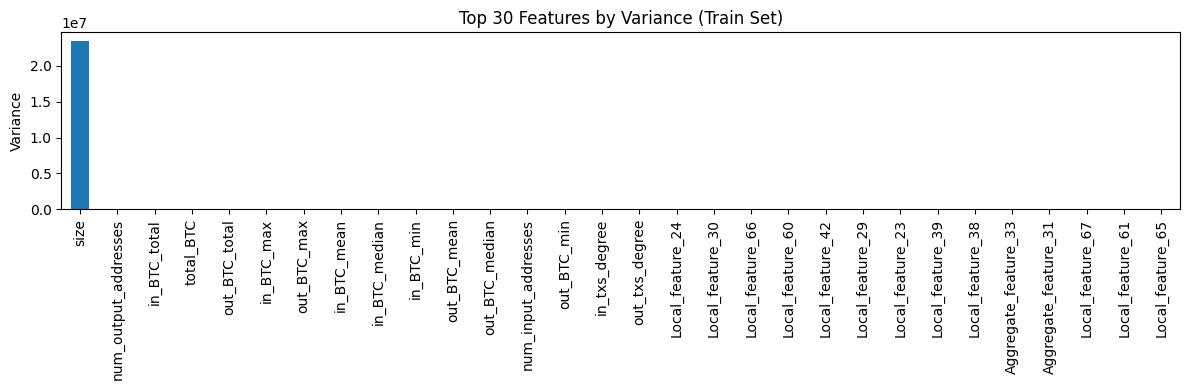

In [ ]:
var_series = X_ad_raw.var().sort_values(ascending=False)

print("Top 10 features by variance:")
display(var_series.head(10))

#top-30 most variable features
plt.figure(figsize=(12,4))
var_series.head(30).plot(kind="bar")
plt.title("Top 30 Features by Variance (Train Set)")
plt.ylabel("Variance")
plt.tight_layout()
plt.show()


As already seen, the top-variance feature is size, followed by some Bitcoin-flow related features.    
It is very interesting to see that size is way more variable than the other features and is the same feature that our best supervised models labelled as very informative.

We will analyze the "anomaly-ness" of these outliers using three simple statistical measures:
* [Z-score](https://www.geeksforgeeks.org/data-science/z-score-in-statistics/): how many standard-deviations make the distance between the outlier and the mean?
* [Interquartile range (IQR)](https://www.geeksforgeeks.org/maths/interquartile-range/): how wide is the middle 50% of the data?
* [Median absolute deviation](https://www.statisticshowto.com/median-absolute-deviation/): literally, what is the median of the absolute deviation of the point from the median?


In [ ]:
def zscore(s, t=3.0):
    mu = s.mean()
    sigma = s.std(ddof=0)
    if sigma == 0:
        return pd.Series(False, index=s.index)
    z = (s - mu) / sigma
    return np.abs(z) > t

def iqr(s, f=1.5):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - f * iqr
    upper = q3 + f * iqr
    return (s < lower) | (s > upper)

def mad(s, k=3.5):
    med = s.median()
    mad = median_abs_deviation(s, scale=1.0)
    if mad == 0:
        return pd.Series(False, index=s.index)
    mod_z = 0.6745 * (s - med) / mad
    return np.abs(mod_z) > k


Our functions use arbitrarily chosen factors to detect outlier if the point ("s"):
* has  z-score greater than t=3
* is out of the IQR-fences more than f=1.5 times the IQR
* has an absolute MAD-standardized deviation from the median greater than k=3.5.  

Given the high complexity and variance of our dataset we expect that many points will be categorizes as outliers.  
We can apply these functions to the top 10 most-variable features we have just found and see how many points are classified as outliers ("out_ratio") and how many illicit transactions there among these ("illicit_ratio").  Then we can compare the illicit ratio with the true ratio of illicit transactions in the training set (i.e.: "y_ad_bin").  
Generally:
* if illicit ratio >> true illicit: the feature is significantly illicit-dense, because it has many illicit outliers.
* if illicit ratio ≈ true illicit: the feature aligns with the regular illicit dispersion of the subset.
* if illicit ratio < true illicit: the feature has few illicit outliers, so it doesn't help in detecting fraudulent transactions.

In [ ]:
uni_rows = []
top_uni_features = var_series.head(10).index.tolist()

for col in top_uni_features:
    s = X_ad_raw[col]

    z_mask   = zscore(s)
    iqr_mask = iqr(s)
    mad_mask = mad(s)

    for name, mask in [("zscore", z_mask), ("iqr", iqr_mask), ("mad", mad_mask)]:
        n_out = int(mask.sum())
        out_ratio = n_out / len(s)
        illicit_ratio = y_ad_bin[mask].mean() if n_out > 0 else 0.0

        uni_rows.append([
            col, name, n_out, out_ratio, illicit_ratio
        ])

pd_uni = pd.DataFrame(
    uni_rows,
    columns=["Feature", "Method", "N_outliers", "Outlier_ratio", "Illicit_ratio"]
)

display(pd_uni)



Feature  Method  N_outliers  Outlier_ratio  Illicit_ratio
0                   size  zscore         240       0.008081       0.054167
1                   size     iqr        3993       0.134449       0.009016
2                   size     mad        3731       0.125627       0.008041
3   num_output_addresses  zscore         100       0.003367       0.000000
4   num_output_addresses     iqr        9522       0.320617       0.237660
5   num_output_addresses     mad           0       0.000000       0.000000
6           in_BTC_total  zscore         245       0.008249       0.000000
7           in_BTC_total     iqr        5284       0.177918       0.030848
8           in_BTC_total     mad        8772       0.295363       0.054264
9              total_BTC  zscore         245       0.008249       0.000000
10             total_BTC     iqr        5283       0.177885       0.030854
11             total_BTC     mad        8772       0.295363       0.054264
12         out_BTC_total  zscore         245       0.008249       0.000000
13         out_BTC_total     iqr        5283       0.177885       0.030854
14         out_BTC_total     mad        8772       0.295363       0.054264
15            in_BTC_max  zscore         217       0.007307       0.000000
16            in_BTC_max     iqr        5306       0.178659       0.031474
17            in_BTC_max     mad        8726       0.293815       0.055123
18           out_BTC_max  zscore         233       0.007845       0.000000
19           out_BTC_max     iqr        5298       0.178390       0.031144
20           out_BTC_max     mad        8820       0.296980       0.055782
21           in_BTC_mean  zscore         197       0.006633       0.000000
22           in_BTC_mean     iqr        5527       0.186101       0.052651
23           in_BTC_mean     mad        8275       0.278629       0.069366
24         in_BTC_median  zscore         196       0.006600       0.000000
25         in_BTC_median     iqr        5730       0.192936       0.061431
26         in_BTC_median     mad        8653       0.291357       0.081475
27            in_BTC_min  zscore         197       0.006633       0.000000
28            in_BTC_min     iqr        5755       0.193778       0.088966
29            in_BTC_min     mad        9657       0.325162       0.146733

How many illicit transactions are really there?

In [ ]:
real_ill_ratio = y_ad_bin.mean() #mean because 1 = illicit and 0 = licit
print("The illicit transactions are",real_ill_ratio*100,"% of the train set")

The illicit transactions are 11.656958146738948 % of the train set


Now let's build a final comparison table:

In [ ]:
pd_uni["True_illicit_ratio"] = real_ill_ratio

def compare_illicit(illicit_ratio, real_ill_ratio):
    if illicit_ratio > 1.5 * real_ill_ratio:
        return "dense"
    elif illicit_ratio < 0.5 * real_ill_ratio:
        return "scarce"
    else:
        return "normal"

pd_uni["Illicit density"] = pd_uni["Illicit_ratio"].apply(
    lambda x: compare_illicit(x, real_ill_ratio)
)
display(pd_uni)

Feature  Method  N_outliers  Outlier_ratio  Illicit_ratio  \
0                   size  zscore         240       0.008081       0.054167   
1                   size     iqr        3993       0.134449       0.009016   
2                   size     mad        3731       0.125627       0.008041   
3   num_output_addresses  zscore         100       0.003367       0.000000   
4   num_output_addresses     iqr        9522       0.320617       0.237660   
5   num_output_addresses     mad           0       0.000000       0.000000   
6           in_BTC_total  zscore         245       0.008249       0.000000   
7           in_BTC_total     iqr        5284       0.177918       0.030848   
8           in_BTC_total     mad        8772       0.295363       0.054264   
9              total_BTC  zscore         245       0.008249       0.000000   
10             total_BTC     iqr        5283       0.177885       0.030854   
11             total_BTC     mad        8772       0.295363       0.054264   
12         out_BTC_total  zscore         245       0.008249       0.000000   
13         out_BTC_total     iqr        5283       0.177885       0.030854   
14         out_BTC_total     mad        8772       0.295363       0.054264   
15            in_BTC_max  zscore         217       0.007307       0.000000   
16            in_BTC_max     iqr        5306       0.178659       0.031474   
17            in_BTC_max     mad        8726       0.293815       0.055123   
18           out_BTC_max  zscore         233       0.007845       0.000000   
19           out_BTC_max     iqr        5298       0.178390       0.031144   
20           out_BTC_max     mad        8820       0.296980       0.055782   
21           in_BTC_mean  zscore         197       0.006633       0.000000   
22           in_BTC_mean     iqr        5527       0.186101       0.052651   
23           in_BTC_mean     mad        8275       0.278629       0.069366   
24         in_BTC_median  zscore         196       0.006600       0.000000   
25         in_BTC_median     iqr        5730       0.192936       0.061431   
26         in_BTC_median     mad        8653       0.291357       0.081475   
27            in_BTC_min  zscore         197       0.006633       0.000000   
28            in_BTC_min     iqr        5755       0.193778       0.088966   
29            in_BTC_min     mad        9657       0.325162       0.146733   

    True_illicit_ratio Illicit density  
0              0.11657          scarce  
1              0.11657          scarce  
2              0.11657          scarce  
3              0.11657          scarce  
4              0.11657           dense  
5              0.11657          scarce  
6              0.11657          scarce  
7              0.11657          scarce  
8              0.11657          scarce  
9              0.11657          scarce  
10             0.11657          scarce  
11             0.11657          scarce  
12             0.11657          scarce  
13             0.11657          scarce  
14             0.11657          scarce  
15             0.11657          scarce  
16             0.11657          scarce  
17             0.11657          scarce  
18             0.11657          scarce  
19             0.11657          scarce  
20             0.11657          scarce  
21             0.11657          scarce  
22             0.11657          scarce  
23             0.11657          normal  
24             0.11657          scarce  
25             0.11657          normal  
26             0.11657          normal  
27             0.11657          scarce  
28             0.11657          normal  
29             0.11657          normal

In [ ]:
meaningful = pd_uni[pd_uni["Illicit density"] == "dense"]
meaningful

Feature Method  N_outliers  Outlier_ratio  Illicit_ratio  \
4  num_output_addresses    iqr        9522       0.320617        0.23766   

   True_illicit_ratio Illicit density  
4             0.11657           dense

The feature representing the number of output addresses is the only one presenting a decent illcit density, but the effect is weak and not sufficient.
The results, as we predicted, are not satisfying: all data is anomalous per se so simple anomaly detection doesn't really help find illicit transactions (i.e.: outlier != illicit).


### Multivariate AD
Multivariate anomaly detection techniques work on the multidimensional geometry of the dataset instead of the single features, so we expect more insightful outcomes.  
We run two standard algorithms:
* Isolation Forest (IF): a set of random trees learnt from unlabelled data that finds points easy to isolate from the others.
* Local Outlier Factor (LOF): measures isolation of the point respect to the closest neighbors, finding points with low local density.

#### IF
Let's start by fitting the model on licit transactions with a contamination score set at 0.02:

In [ ]:
mask_licit_if = (y_ad_bin == 0)
X_if_train = X_pca10[mask_licit_if]

iso = IsolationForest(
    n_estimators=200,
    max_samples="auto",
    contamination=0.02,
    random_state=42,
    n_jobs=-1
)

iso.fit(X_if_train)

IsolationForest(contamination=0.02, n_estimators=200, n_jobs=-1,
                random_state=42)

Now let's translate the analysis done by the IF in simple calculated scores to aid us in the interpretation and comparison of the results:

In [ ]:
#anomaly score on sample given by the IF, we put - so the higher the more anomalous
scores_if = -iso.score_samples(X_pca10)
#prediction of the iso, 1 = normal, -1 = outlier
pred_if = iso.predict(X_pca10)
#then 0 = normal, 1 = outlier
out_if  = (pred_if == -1).astype(int)

And now let's try to build a summary dataframe exploiting this scores to evaluate the prediction done by the IF:

In [ ]:
#build a mock dataframe
df_if = df_ad.copy()
df_if["IF_score"]   = scores_if
df_if["IF_outlier"] = out_if
df_if["y_bin"]      = y_ad_bin
df_results = df_if.copy()

n_out_if = int(df_if["IF_outlier"].sum())
print(f"\nIF Outliers: {n_out_if}/{len(df_if)} ({n_out_if/len(df_if):.4%})")

print("\nClass distribution among IF outliers:")
display(
    df_if[df_if["IF_outlier"] == 1]["class"]
         .value_counts(normalize=True)
         .rename("ratio").to_frame()
)

print("\nClass distribution among IF non-outliers:")
display(
    df_if[df_if["IF_outlier"] == 0]["class"]
         .value_counts(normalize=True)
         .rename("ratio").to_frame()
)

illicit_if = df_if[df_if["IF_outlier"] == 1]["y_bin"].mean()
print("\nIllicit ratio among IF outliers: ", illicit_if)
print("Baseline illicit ratio:           ", real_ill_ratio)



IF Outliers: 536/29699 (1.8048%)

Class distribution among IF outliers:


ratio
class          
2      0.979478
1      0.020522


Class distribution among IF non-outliers:


ratio
class          
2      0.881665
1      0.118335


Illicit ratio among IF outliers:  0.020522388059701493
Baseline illicit ratio:            0.11656958146738948


IF struggles to find outliers, and the one that it finds are not meaningful.  On the opposite: there are far more illit transactions among the values considered as normal!  
We confirm that this anomaly detection technique isn't useful for our datatset.  
Given that the data is temporally divided, if we try to see these results for each time step, can we obtain a better picture?

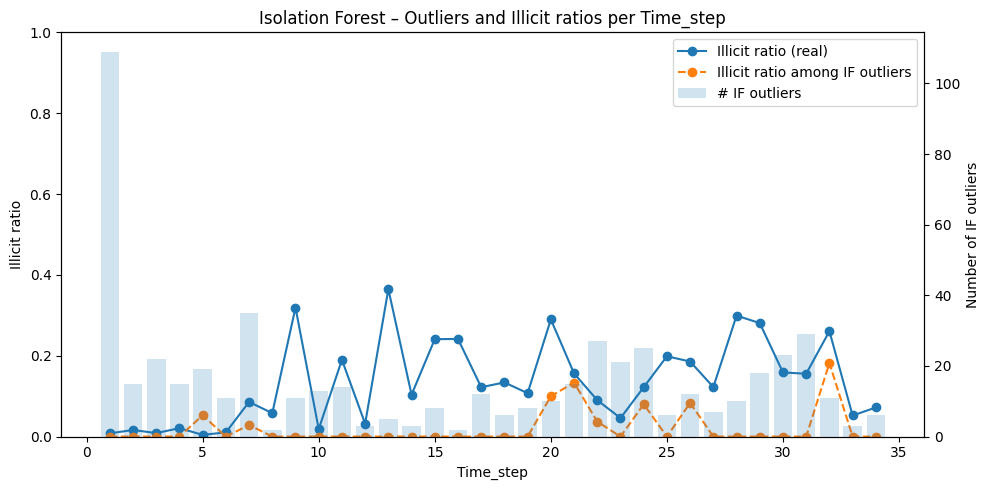

In [ ]:
illicit_ts = (
    df_results
    .groupby("Time_step")["y_bin"]
    .mean()
)

illicit_if_ts = (
    df_results[df_results["IF_outlier"] == 1]
    .groupby("Time_step")["y_bin"]
    .mean()
)

out_if_ts = (
    df_results
    .groupby("Time_step")["IF_outlier"]
    .sum()
)

time_index = sorted(df_results["Time_step"].unique())
illicit_ts = illicit_ts.reindex(time_index)
illicit_if_ts = illicit_if_ts.reindex(time_index)
out_if_ts = out_if_ts.reindex(time_index).fillna(0)

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(time_index, illicit_ts.values, marker="o", linestyle="-", label="Illicit ratio (real)")
ax1.plot(time_index, illicit_if_ts.values, marker="o", linestyle="--", label="Illicit ratio among IF outliers")
ax1.set_xlabel("Time_step")
ax1.set_ylabel("Illicit ratio")
ax1.set_ylim(0, 1)

ax2 = ax1.twinx()
ax2.bar(time_index, out_if_ts.values, alpha=0.2, label="# IF outliers")
ax2.set_ylabel("Number of IF outliers")

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper right")

plt.title("Isolation Forest – Outliers and Illicit ratios per Time_step")
plt.tight_layout()
plt.show()


This confirms the inefficacy of IF: the IF illicits line is way below the real illicit line.  
Now, let's try to have a visual representation of the """thought process""" of the IF (we have to run another IF on a PCA2 reduced dataset to obtain a scatterplot).  
This graph is not precise, but it is an interesting visual perspective on why this algorithm didn't work the dataset:

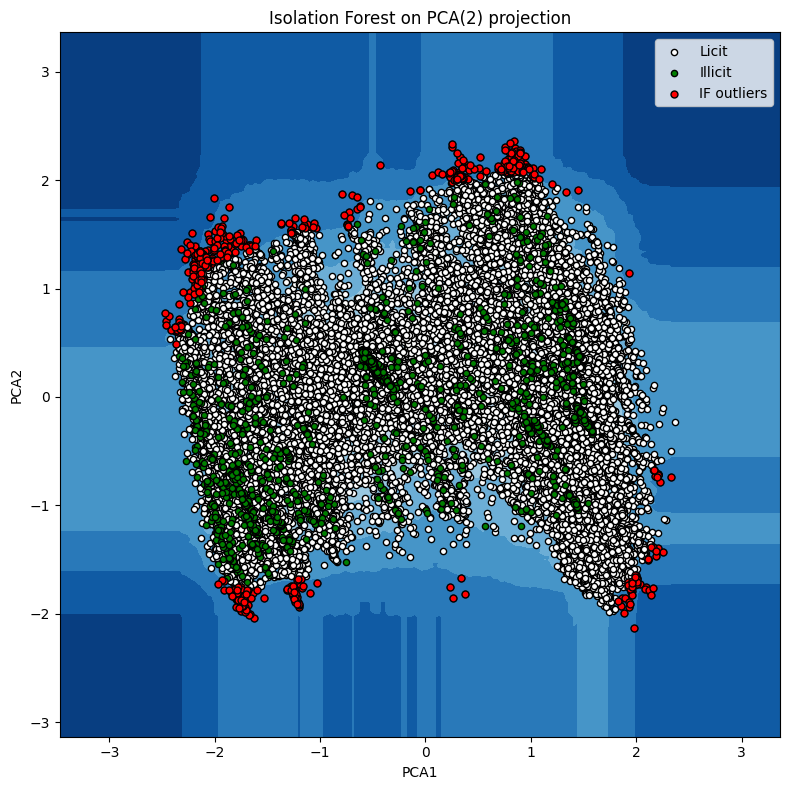

In [ ]:
pca_2 = PCA(n_components=2, random_state=42)
X_pca2 = pca_2.fit_transform(X_train_scaled)

iso2 = IsolationForest(
    n_estimators=200,
    max_samples="auto",
    contamination=0.02,
    random_state=42,
    n_jobs=-1
)
iso2.fit(X_pca2)

#score + predictions
raw_scores_if_2d = iso2.decision_function(X_pca2)  #the lower the more anomalous
pred_if_2d = iso2.predict(X_pca2)                  # 1 = normal, -1 = outlier
out_mask_if_2d = (pred_if_2d == -1)

x_min, x_max = X_pca2[:, 0].min() - 1, X_pca2[:, 0].max() + 1
y_min, y_max = X_pca2[:, 1].min() - 1, X_pca2[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

Z_if = iso2.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_if = Z_if.reshape(xx.shape)

licit_pts   = X_pca2[y_train == 0]
illicit_pts = X_pca2[y_train == 1]
out_pts_if  = X_pca2[out_mask_if_2d]

plt.figure(figsize=(8, 8))
plt.title("Isolation Forest on PCA(2) projection")

plt.contourf(xx, yy, Z_if, cmap=plt.cm.Blues_r) #the lighter the blue, the more normal the area is considered

b1 = plt.scatter(licit_pts[:, 0], licit_pts[:, 1],
                 c='white', s=20, edgecolor='k', label="Licit")
b2 = plt.scatter(illicit_pts[:, 0], illicit_pts[:, 1],
                 c='green', s=20, edgecolor='k', label="Illicit")
c  = plt.scatter(out_pts_if[:, 0], out_pts_if[:, 1],
                 c='red', s=25, edgecolor='k', label="IF outliers")

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

We see the same outcomes we saw with the clustering algorithms: the structure is chaotic, with illicit datapoints overlapping licit ones.  It seems that the IF takes the only "edges" of the shape as anomalies, but it fails given the complexity of the set.

#### LOF
Given that we saw with the k-means algorithms that illicit transactions appear more scattered than the licit ones, so maybe the LOF should understand the geometry of the data better (?).
The interpretation of the geometry of the dataset has been difficult, but let's run a LOF and see:

In [ ]:
lof = LocalOutlierFactor(
    n_neighbors=20,
    contamination=0.02,
    novelty=False,
    n_jobs=-1
)


And calculate the same scores:

In [ ]:
#fit and predict LOF (no separate code like IF)
pred_lof = lof.fit_predict(X_pca10)
raw_scores_lof = lof.negative_outlier_factor_
scores_lof = -raw_scores_lof
out_lof = (pred_lof == -1).astype(int)

In [ ]:
df_lof = df_ad.copy()
df_lof["LOF_score"]   = scores_lof
df_lof["LOF_outlier"] = out_lof
df_lof["y_bin"]       = y_ad_bin
df_results["LOF_score"]   = df_lof["LOF_score"]
df_results["LOF_outlier"] = df_lof["LOF_outlier"]


n_out_lof = int(df_lof["LOF_outlier"].sum())
print(f"\nLOF Outliers: {n_out_lof}/{len(df_lof)} ({n_out_lof/len(df_lof):.4%})")

print("\nClass distribution among LOF outliers:")
display(
    df_lof[df_lof["LOF_outlier"] == 1]["class"]
          .value_counts(normalize=True)
          .rename("ratio").to_frame()
)

print("\nClass distribution among LOF non-outliers:")
display(
    df_lof[df_lof["LOF_outlier"] == 0]["class"]
          .value_counts(normalize=True)
          .rename("ratio").to_frame()
)

illicit_lof = df_lof[df_lof["LOF_outlier"] == 1]["y_bin"].mean()
print("\nIllicit ratio among LOF outliers: ", illicit_lof)
print("Baseline illicit ratio:            ", real_ill_ratio)



LOF Outliers: 594/29699 (2.0001%)

Class distribution among LOF outliers:


ratio
class          
2      0.708754
1      0.291246


Class distribution among LOF non-outliers:


ratio
class          
2      0.886995
1      0.113005


Illicit ratio among LOF outliers:  0.29124579124579125
Baseline illicit ratio:             0.11656958146738948


The LOF did a lot better: about 1/3 of the outliers is an illicit transactions. The illicit ratio in the non outliers is the same as the normal ratio though.
However, the problem is the same as IF: it founds very few illicit transactions overall (about 1/6). This model is better overall for anomaly detection, but the results are unsatisfying nontheless.  
Let's see the detection per time step:

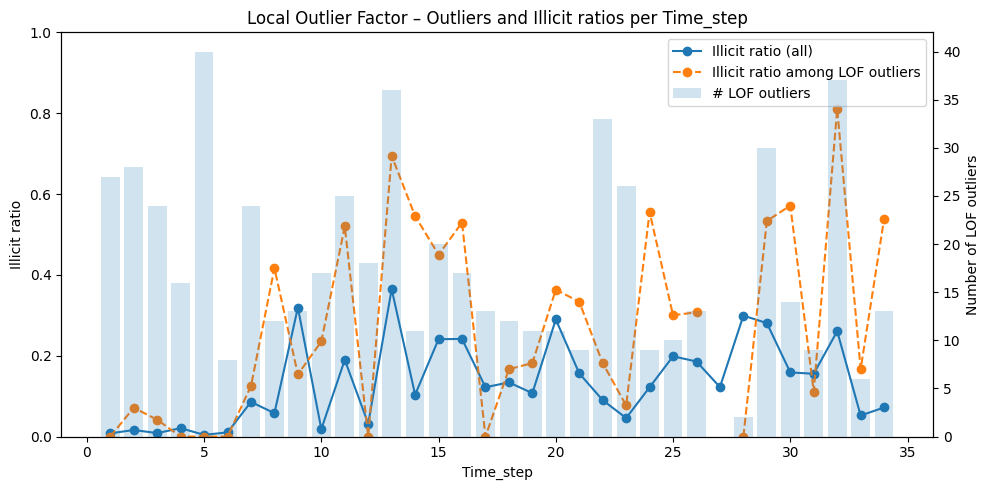

In [ ]:
illicit_ts = (
    df_results
    .groupby("Time_step")["y_bin"]
    .mean()
)

illicit_lof_ts = (
    df_results[df_results["LOF_outlier"] == 1]
    .groupby("Time_step")["y_bin"]
    .mean()
)

out_lof_ts = (
    df_results
    .groupby("Time_step")["LOF_outlier"]
    .sum()
)

time_index = sorted(df_results["Time_step"].unique())
illicit_ts = illicit_ts.reindex(time_index)
illicit_lof_ts = illicit_lof_ts.reindex(time_index)
out_lof_ts = out_lof_ts.reindex(time_index).fillna(0)

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(time_index, illicit_ts.values, marker="o", linestyle="-", label="Illicit ratio (all)")
ax1.plot(time_index, illicit_lof_ts.values, marker="o", linestyle="--", label="Illicit ratio among LOF outliers")
ax1.set_xlabel("Time_step")
ax1.set_ylabel("Illicit ratio")
ax1.set_ylim(0, 1)

ax2 = ax1.twinx()
ax2.bar(time_index, out_lof_ts.values, alpha=0.2, label="# LOF outliers")
ax2.set_ylabel("Number of LOF outliers")

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper right")

plt.title("Local Outlier Factor – Outliers and Illicit ratios per Time_step")
plt.tight_layout()
plt.show()


The performance is way better than the IF's: the illicit LOF line tends more to follow the real illicit ratio path, often staying upwards.  
This indicates that in some time steps the LOF algorithm is efficient in finding meaningful outliers.  The problem is that these outliers are very few.

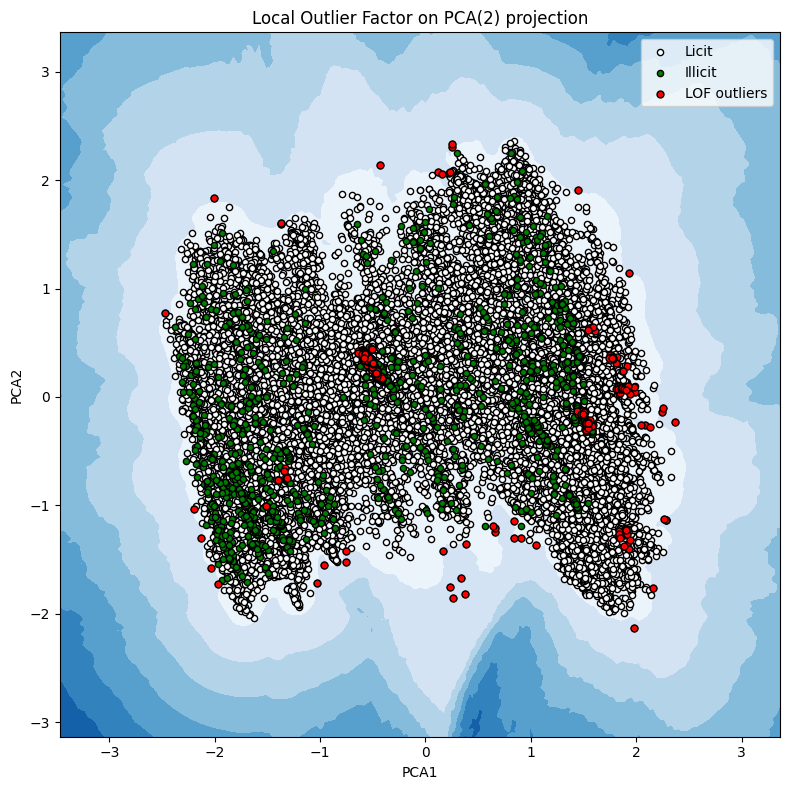

In [ ]:
#code like before
lof2 = LocalOutlierFactor(
    n_neighbors=20,
    contamination=0.02,
    novelty=True,
    n_jobs=-1
)

lof2.fit(X_pca2)

raw_scores_lof_2d = lof2.decision_function(X_pca2)  #like before
pred_lof_2d = lof2.predict(X_pca2)
out_mask_lof_2d = (pred_lof_2d == -1)

x_min, x_max = X_pca2[:, 0].min() - 1, X_pca2[:, 0].max() + 1
y_min, y_max = X_pca2[:, 1].min() - 1, X_pca2[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

Z_lof = lof2.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_lof = Z_lof.reshape(xx.shape)

licit_pts   = X_pca2[y_train == 0]
illicit_pts = X_pca2[y_train == 1]
out_pts_lof = X_pca2[out_mask_lof_2d]

plt.figure(figsize=(8, 8))
plt.title("Local Outlier Factor on PCA(2) projection")

plt.contourf(xx, yy, Z_lof, cmap=plt.cm.Blues_r)

b1 = plt.scatter(licit_pts[:, 0], licit_pts[:, 1],
                 c='white', s=20, edgecolor='k', label="Licit")
b2 = plt.scatter(illicit_pts[:, 0], illicit_pts[:, 1],
                 c='green', s=20, edgecolor='k', label="Illicit")
c  = plt.scatter(out_pts_lof[:, 0], out_pts_lof[:, 1],
                 c='red', s=25, edgecolor='k', label="LOF outliers")

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


LOF managed to isolate outliers inside the shape too - so it captured better the data behavior, identifying illicit transactions among the licit ones.

### AD Recap
The ratios of found illicit transactions among the outliers are very different among the two models, with LOF being way more performant than IF:

In [ ]:
print(f"Baseline illicit ratio: {real_ill_ratio:.4f}")
print(f"Illicit ratio IF outliers:  {illicit_if:.4f}")
print(f"Illicit ratio LOF outliers: {illicit_lof:.4f}")

Baseline illicit ratio: 0.1166
Illicit ratio IF outliers:  0.0205
Illicit ratio LOF outliers: 0.2912


But if we intersect the results, what do we obtain?

In [ ]:
mask_both = (df_results["IF_outlier"]==1) & (df_results["LOF_outlier"]==1)
df_both = df_results[mask_both]

print("\nCommon IF & LOF outliers:", len(df_both))
print("Illicit ratio among common outliers:", df_both["y_bin"].mean())

print("\nCommon outliers per Time_step and class (head):")
display(
    df_both.groupby(["Time_step","class"])
           .size()
           .unstack(fill_value=0)
           .head(15)
)



Common IF & LOF outliers: 3
Illicit ratio among common outliers: 0.0

Common outliers per Time_step and class (head):


class      2
Time_step   
5          1
18         1
31         1

In [ ]:
df_results[(df_results["IF_outlier"]==1) & (df_results["LOF_outlier"]==1)]


Time_step  Local_feature_1  Local_feature_2  Local_feature_3  \
txId                                                                      
225877514          5        -0.172973        -0.158783        -1.201369   
248923460         18        -0.172940        -0.158783        -1.201369   
382920729         31        -0.172718        -0.003472        -1.201369   

           Local_feature_4  Local_feature_5  Local_feature_6  Local_feature_7  \
txId                                                                            
225877514        -0.046932        -0.043875         -0.02914        -0.061584   
248923460        -0.046932        -0.043875         -0.02914        -0.061584   
382920729        -0.046932        -0.043875         -0.02914        -0.061584   

           Local_feature_8  Local_feature_9  ...  out_BTC_mean  \
txId                                         ...                 
225877514        -0.163645        -0.169450  ...      0.000745   
248923460        -0.163635        -0.169427  ...      0.003368   
382920729        -0.163589        -0.169244  ...      0.020986   

           out_BTC_median  out_BTC_total  class  y  IF_score  IF_outlier  \
txId                                                                       
225877514        0.000745       0.001489      2  0  0.540262           1   
248923460        0.003368       0.006736      2  0  0.542670           1   
382920729        0.020986       0.041973      2  0  0.559150           1   

           y_bin  LOF_score  LOF_outlier  
txId                                      
225877514      0   6.158821            1  
248923460      0   2.598701            1  
382920729      0   2.861697            1  

[3 rows x 190 columns]

The common outliers are only 3 and are not illicit transactions - no useful insight if we cross the results.  
Nonetheless, thanks to all these analyses we have learnt that:
* The dataset structure confirms its complex structure, with many outliers. Outlier doesn't mean illicit.
* Univariate AD is too simple for this kind of data, but an accurate analysis on the variance of the features is anyway fundamental.
* Multivariate AD ar the better choice, with LOF being, in some way and partially, capable of capturing the ambiguos geometry of the data points.
* Overall, baseline Anomaly detection techniques are not suggested for this kind of data.

## Graph-based Learning (DEMO)
We have learnt that a dataset like ours is too complex to be drawn in a 2D space. If we start with 182 dimensions and want a plain graph, we inevitably obtain an imprecise and incomplete representation of the real data. The graphs we computed were enough for our previous tasks: we understood the chaos of the structure and learnt which algorithms are more appropriate and which not for classification.  
The only effective results were obtained from Supervised Learning, which did not operate on the overall dimensionality of the dataset, but only worked on learning which features are more useful to classify the transaction.  While Unsupervised Learning and Anomaly Detection struggled to give decent results.  
So, let's see what is done in the real-world research to capture the nature of Bitcoin transactions.

### Network Graph Representations
Hence, let's start by drawing a Money Flow Transaction Graph: it shows *BTC flow from one transaction to the next, allowing exploration of the spatial and temporal patterns surrounding a given transaction (source: [Elmougy & Liu, 2023](https://arxiv.org/pdf/2306.06108))*.  
We can check how to code this by looking at the [dataset github page](https://github.com/git-disl/EllipticPlusPlus/blob/main/Transactions%20Dataset/Elliptic%2B%2B_Transactions_Graph_Visualization.ipynb).  
First, let's try to draw the Transaction-Transaction graph on a subset of 1000 transactions of the Time_step = 32 (like the authors did):

In [ ]:
#remember our merged and cleaned dataset?
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202804 entries, 3321 to 194835939
Columns: 184 entries, Time_step to class
dtypes: float64(182), int64(2)
memory usage: 286.2 MB


In [ ]:
#load all the edgelist
df_edges = pd.read_csv("txs_edgelist.csv", low_memory=False)

In [ ]:
#define graph tx
graph = nx.from_pandas_edgelist(
    df_edges,
    source="txId1",
    target="txId2",
    create_using=nx.DiGraph()
)

In [ ]:
all_ids = df[df['Time_step'] == 32].index.unique().tolist()
N_SAMPLE = 1000  #max

if len(all_ids) > N_SAMPLE:
    sample_nodes = random.sample(all_ids, N_SAMPLE)
else:
    sample_nodes = all_ids[:]  # tutti

subgraph = graph.subgraph(sample_nodes).copy()
pos = nx.spring_layout(subgraph, seed=42)

edge_x = []
edge_y = []
for edge in subgraph.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=0.5, color='blue'),
    hoverinfo='none',
    mode='lines'
)

node_x = []
node_y = []
node_text = []

for node in subgraph.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(str(node))

node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Transaction Type',
            xanchor='left',
            titleside='right',
            tickmode='array',
            tickvals=[3, 1, 2],
            ticktext=['Unknown', 'Illicit', 'Licit']
        ),
        line_width=2
    )
)

node_trace.text = node_text

classes_for_nodes = df.loc[list(subgraph.nodes()), 'class']
node_trace.marker.color = pd.to_numeric(classes_for_nodes)

fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title=f"Sample of Transactions in Time Step 32 (n={subgraph.number_of_nodes()})",
        titlefont_size=16,
        showlegend=False,
        hovermode='closest',
        margin=dict(b=20, l=5, r=5, t=40),
        annotations=[
            dict(
                showarrow=True,
                xref="paper", yref="paper",
                x=0.005,
                y=-0.002,
                text=f"Max {N_SAMPLE} nodes sampled from Time_step=32"
            )
        ],
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
    )
)

fig.show()


This is a more realistic representation of the transaction net: every node is a transaction, and every transaction is connected with at least another one.  
A Bitcoin transaction works this way: the output of a transaction is used as input by onether one. Putted simply: if I buy a gun on the black market for  1BTC, that same BTC will be probably spent by the seller for another transaction.  
We see that fraudulent transactions (i.e.: the darker points) are often connected one to another!    
Our first df included many unknown transactions (i.e.: the yellow dots), so let's try with a subset of the dataset we in fact used for our ML algorithms (only with licit and illicit) to see these fraudulent-chains more clearly:

In [ ]:
N_SEED = 2000
STEP_FILTER = None  #could filter per time step, we didn't do it here

if STEP_FILTER is None:
    df_sup_sub = df_sup
else:
    df_sup_sub = df_sup[df_sup["Time_step"] == STEP_FILTER]

all_ids = df_sup_sub.index.unique()

n_seed = min(N_SEED, len(all_ids))
seed_ids = np.random.choice(all_ids, size=n_seed, replace=False)

edges_sup = df_edges[
    df_edges["txId1"].isin(seed_ids) &
    df_edges["txId2"].isin(df_sup.index)
]

G = nx.from_pandas_edgelist(
    edges_sup,
    source="txId1",
    target="txId2",
    create_using=nx.DiGraph()
)

pos = nx.spring_layout(G, seed=42)

edge_x, edge_y = [], []
for u, v in G.edges():
    x0, y0 = pos[u]
    x1, y1 = pos[v]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    mode="lines",
    line=dict(width=0.5, color="lightgray"),
    hoverinfo="none"
)

node_x, node_y, node_text = [], [], []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(str(node))

node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    mode="markers",
    hoverinfo="text",
    text=node_text,
    marker=dict(
        size=7,
        color=[],
        line_width=0.5,
        colorbar=dict(
            title="Transaction class",
            tickvals=[1, 2],
            ticktext=["Illicit", "Licit"]
        )
    )
)

classes_for_nodes = df_sup.loc[list(G.nodes()), "class"]
node_trace.marker.color = classes_for_nodes.values

title_step = f"(Time_step={STEP_FILTER})" if STEP_FILTER is not None else "(all steps)"
fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title=f"Subset Transaction–Transaction Graph {title_step}",
        showlegend=False,
        hovermode="closest",
        margin=dict(b=20, l=5, r=5, t=40),
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
    )
)
fig.show()

We have few illicit transactions among the licit ones.  Illicit seems to usually be connected to at least another illicit one.  
Now, we discarded the wallets data because we reckoned it was easier and more useful to work directly on the classification of transactions; but the provided wallets' edgelists provide another interesting graph - the Address-Transaction Graph. This is a heterogenous graph showing flow of BTC across transactions and addresses, allowing an evaluation of purposes of a transaction and the
relationships among addresses of the same transaction.  
Seeing the connection between fraudulent transaction is useful - but seeing the connection between an illicit transaction and who is involved is far more useful for us financial forensic scientists!

In [ ]:
#reload what we need just to be sure
wallets_classes = pd.read_csv("wallets_classes.csv")
addr_tx = pd.read_csv("AddrTx_edgelist.csv")
tx_addr = pd.read_csv("TxAddr_edgelist.csv")
#and keep only licit and illicit to be clean
wallets_classes = wallets_classes[wallets_classes["class"].isin([1, 2])]

In [ ]:
#how were the columns named??
print(pd.read_csv("wallets_classes.csv", nrows=1).columns)
print(pd.read_csv("AddrTx_edgelist.csv", nrows=1).columns)
print(pd.read_csv("TxAddr_edgelist.csv", nrows=1).columns)

Index(['address', 'class'], dtype='object')
Index(['input_address', 'txId'], dtype='object')
Index(['txId', 'output_address'], dtype='object')


In [ ]:
N_ADDR_SEED = 500
all_addresses = wallets_classes["address"].unique()

n_seed = min(N_ADDR_SEED, len(all_addresses))
seed_addresses = np.random.choice(all_addresses, size=n_seed, replace=False)

edges_a2t = addr_tx[addr_tx["input_address"].isin(seed_addresses)]

tx_ids = edges_a2t["txId"].unique()

edges_t2a = tx_addr[tx_addr["txId"].isin(tx_ids)]

G = nx.DiGraph()

addr_class_map = wallets_classes.set_index("address")["class"].to_dict()

for a in seed_addresses:
    G.add_node(f"addr_{a}", node_type="address", addr=a, addr_class=addr_class_map.get(a, 3))

for t in tx_ids:
    G.add_node(f"tx_{t}", node_type="transaction", tx=t)

for _, row in edges_a2t.iterrows():
    a = row["input_address"]
    t = row["txId"]
    src = f"addr_{a}"
    dst = f"tx_{t}"
    if src in G and dst in G:
        G.add_edge(src, dst)

for _, row in edges_t2a.iterrows():
    t = row["txId"]
    a = row["output_address"]
    src = f"tx_{t}"
    dst = f"addr_{a}"
    if src in G:
        if f"addr_{a}" not in G:
            G.add_node(f"addr_{a}", node_type="address", addr=a, addr_class=3)
        G.add_edge(src, f"addr_{a}")

pos = nx.spring_layout(G, seed=42)

edge_x, edge_y = [], []
for u, v in G.edges():
    x0, y0 = pos[u]
    x1, y1 = pos[v]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    mode="lines",
    line=dict(width=0.4, color="lightgray"),
    hoverinfo="none",
    showlegend=False
)

addr_illicit_x, addr_illicit_y = [], []
addr_licit_x, addr_licit_y = [], []
addr_unknown_x, addr_unknown_y = [], []
tx_x, tx_y = [], []

for n, data in G.nodes(data=True):
    x, y = pos[n]

    if data["node_type"] == "address":
        c = data.get("addr_class", 3)
        if c == 1:
            addr_illicit_x.append(x)
            addr_illicit_y.append(y)
        elif c == 2:
            addr_licit_x.append(x)
            addr_licit_y.append(y)
        else:
            addr_unknown_x.append(x)
            addr_unknown_y.append(y)
    else:
        tx_x.append(x)
        tx_y.append(y)

trace_addr_illicit = go.Scatter(
    x=addr_illicit_x, y=addr_illicit_y,
    mode="markers",
    name="Illicit Address",
    marker=dict(color="red", size=6),
    hoverinfo="none"
)

trace_addr_licit = go.Scatter(
    x=addr_licit_x, y=addr_licit_y,
    mode="markers",
    name="Licit Address",
    marker=dict(color="green", size=6),
    hoverinfo="none"
)

trace_addr_unknown = go.Scatter(
    x=addr_unknown_x, y=addr_unknown_y,
    mode="markers",
    name="Unknown Address",
    marker=dict(color="gray", size=6),
    hoverinfo="none"
)

trace_tx = go.Scatter(
    x=tx_x, y=tx_y,
    mode="markers",
    name="Transaction",
    marker=dict(color="orange", size=4),
    hoverinfo="none"
)

fig = go.Figure(
    data=[edge_trace,
          trace_addr_illicit,
          trace_addr_licit,
          trace_addr_unknown,
          trace_tx],
    layout=go.Layout(
        title="Address–Transaction Graph (subset of addresses)",
        showlegend=True,
        hovermode="closest",
        margin=dict(b=20, l=5, r=5, t=40),
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
    )
)

fig.show()


Here we see a similar structure but with a different meaning: we can see the illicit actors and which transactions they are involved in.  This is another fundamental graph representation - crossing multiple graphs give very useful info! In our case, we could see which transaction and actors are illicit, who do they send BTC to and recieve from, and the overall behavior of the money flow.

### Graph Neural Networks
The solution is using algorithms made for capturing the network relationships: fortunately, they exist and they are called [Graph Neural Networks](https://www.geeksforgeeks.org/deep-learning/what-are-graph-neural-networks/).  
Graph Neural Networks (GNNs) are a class of deep learning models designed to work with graph-structured data, where information is represented as nodes and edges. Unlike traditional neural networks that handle fixed-size inputs, GNNs capture relationships, dependencies and interactions between entities.  
[Graph Convolution Networks](https://www.geeksforgeeks.org/deep-learning/graph-convolutional-networks-gcns-architectural-insights-and-applications/) are an interesting GNN application.  They differ from their  famous cousins - the [CNNs](https://www.geeksforgeeks.org/computer-vision/how-do-convolutional-neural-networks-cnns-work/) (Convolutional Neural Networks) - because they are tailored to work with non-Euclidean data, making them suitable for a wide range of applications including social networks, molecular structures, and recommendation systems.  
To have a perspective for our work:
* We worked with a MLP NN for supervised learning, which is a simple NN that is able to capture non-linear boundaries. Has input layer + hidden layer + output layer. It is not a GNN.
* CNN is a NN specialized for grid-structured data, good at extracting features. Has input layer + Convolutional layer + pooling layer + output layer + fully connected layers. It is not a GNN.
* GCN has a different architecture than the CNN. Has input layer + GC layers + activation functions + pooling layers + output layers + fully connected layers. It is a GNN.  
The literature that we have [already cited](https://arxiv.org/pdf/2306.06108) highlight the importance of GCNs for capturing the nature of Blockchain transactions.  
They [either](https://link.springer.com/article/10.1007/s00500-022-07779-1?) use GCNs for classifiers' input [or](https://www.nature.com/articles/s41598-025-95672-w.pdf) develop advanced GCNs directly to classify transactions.     

The important takeaway is this:  
Faithful and precise data representation is fundamental for developing high-end ML models. In the Blockchain - and in other network-like structures - the relationship between elements are complex and simple 2D graph projections are not enough! Feature analysis and engineering have to start from a faithful analysis of the data structure itself!

## Key Takeaways
We have shown that Machine Learning algorithms are useful for the cybersecurity of the Blockchain environement.  
We reckon that we have obtained many different interesting insights about this kind of ML application:
* The nature of this kind of data is complex: feature quantity and nature, feature correlation, feature statistical behavior, unbalanced temporal distribution, unbalanced class distribution, outliers,... So an attentive and critical interpretation and manipulation is the mandatory first step for these kind of analyses!
* Some complex non-linear algorithms, especially XGBoost, even if not optimally tuned, show promising results for classifying transactions. The issue is finding truthfully labelled data, so the application in the real world may be more difficult.
* Due to the geometry of the data, unsupervised learning struggles to create meaningful clusters of transactions: but it could be used to engineer features to add to suoervised learning train models!
* Given the presence of many outliers and the  distribution of the data, anomaly Detection techniques are not recommended for this kind of data. Nevertheless, it is recommended to study these outliers and compute exhaustive summary statistical anlayses.

Additionally, we've have briefly showcased that Network Graphs are the best representation for this kind of data, and help us interpret the complex structure of the datapoints. Graph-based learning looks like the most promising technique to analyze these kind of datasets.  

The topic of our research remains very relevant in the current cybersecurity landscape, and the possibilities of further research are many:
* Study the correlation between the size in bytes of a transactions and its class to create first-level filters directly in the blockchain.
* Tune and refine ensembles like XGBoost, LightGBM and RF to create more powerful supervised ML algorithms. Like by using train/validate/test sets or optimization techniques.   
* Make use of the unknown transactions, maybe with Positive-uinlabeled learning techniques, to exploit the datasets better.  

Overall, we hope that our research, despite its limitations, may serve as a solid foundation for further research on *Machine Learning Techniques for Bitcoin Blockchain Transactions Classification!*